In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('Loan_default.csv')

In [3]:
def convert_to_idr(amount_usd, exchange_rate=15358):
    return amount_usd * exchange_rate

usd_columns = ['Income', 'LoanAmount']
data[usd_columns] = data[usd_columns].apply(lambda x: convert_to_idr(x))
print(data)

            LoanID  Age      Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56  1320695852   776915146          520              80   
1       HPSK72WA7R   69   774534656  1911149520          458              15   
2       C1OZ6DPJ8Y   46  1293266464  1984069304          451              26   
3       V2KKSFM3UN   32   487048254   688023042          743               0   
4       EY08JDHTZP   60   313871446   140356762          633               8   
...            ...  ...         ...         ...          ...             ...   
255342  8C6S86ESGC   19   583281482  3235654156          541             109   
255343  98R4KDHNND   32   797894174  2916468842          511              14   
255344  XQK1UUUNGP   56  1302665560  3198979252          597              70   
255345  JAO28CPL4H   42  1307104022   930310850          809              40   
255346  ZTH91CGL0B   62   344295644   283831198          636             113   

        NumCreditLines  InterestRate  L

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
data['Default'] = data['Default'].map({0: 'Not Defaulted', 1: 'Defaulted'}).astype('category')

In [6]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [7]:
data

LoanID  Age      Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56  1320695852   776915146          520              80   
1       HPSK72WA7R   69   774534656  1911149520          458              15   
2       C1OZ6DPJ8Y   46  1293266464  1984069304          451              26   
3       V2KKSFM3UN   32   487048254   688023042          743               0   
4       EY08JDHTZP   60   313871446   140356762          633               8   
...            ...  ...         ...         ...          ...             ...   
255342  8C6S86ESGC   19   583281482  3235654156          541             109   
255343  98R4KDHNND   32   797894174  2916468842          511              14   
255344  XQK1UUUNGP   56  1302665560  3198979252          597              70   
255345  JAO28CPL4H   42  1307104022   930310850          809              40   
255346  ZTH91CGL0B   62   344295644   283831198          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0                    4         15.23        36      0.44   Bachelor's   
1                    1          4.81        60      0.68     Master's   
2                    3         21.17        24      0.31     Master's   
3                    3          7.07        24      0.23  High School   
4                    4          6.51        48      0.73   Bachelor's   
...                ...           ...       ...       ...          ...   
255342               4         14.11        12      0.85   Bachelor's   
255343               2         11.55        24      0.21  High School   
255344               3          5.29        60      0.50  High School   
255345               1         20.90        48      0.44  High School   
255346               2          6.73        12      0.48   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0           Full-time      Divorced         Yes           Yes       Other   
1           Full-time       Married          No            No       Other   
2          Unemployed      Divorced         Yes           Yes        Auto   
3           Full-time       Married          No            No    Business   
4          Unemployed      Divorced          No           Yes        Auto   
...               ...           ...         ...           ...         ...   
255342      Full-time       Married          No            No       Other   
255343      Part-time      Divorced          No            No        Home   
255344  Self-employed       Married         Yes           Yes        Auto   
255345      Part-time        Single         Yes           Yes       Other   
255346     Unemployed      Divorced         Yes            No   Education   

       HasCoSigner        Default  
0              Yes  Not Defaulted  
1              Yes  Not Defaulted  
2               No      Defaulted  
3               No  Not Defaulted  
4               No  Not Defaulted  
...            ...            ...  
255342          No  Not Defaulted  
255343          No      Defaulted  
255344         Yes  Not Defaulted  
255345          No  Not Defaulted  
255346         Yes  Not Defaulted  

[255347 rows x 18 columns]

# Exploratory Data Analysis (EDA)

## Analisis Normalitas

### Plot Q-Q (Quantile-Quantile)

Plot Q-Q digunakan untuk memeriksa apakah distribusi dari suatu variabel mengikuti distribusi normal. Berikut adalah plot Q-Q untuk beberapa variabel penting dalam dataset.

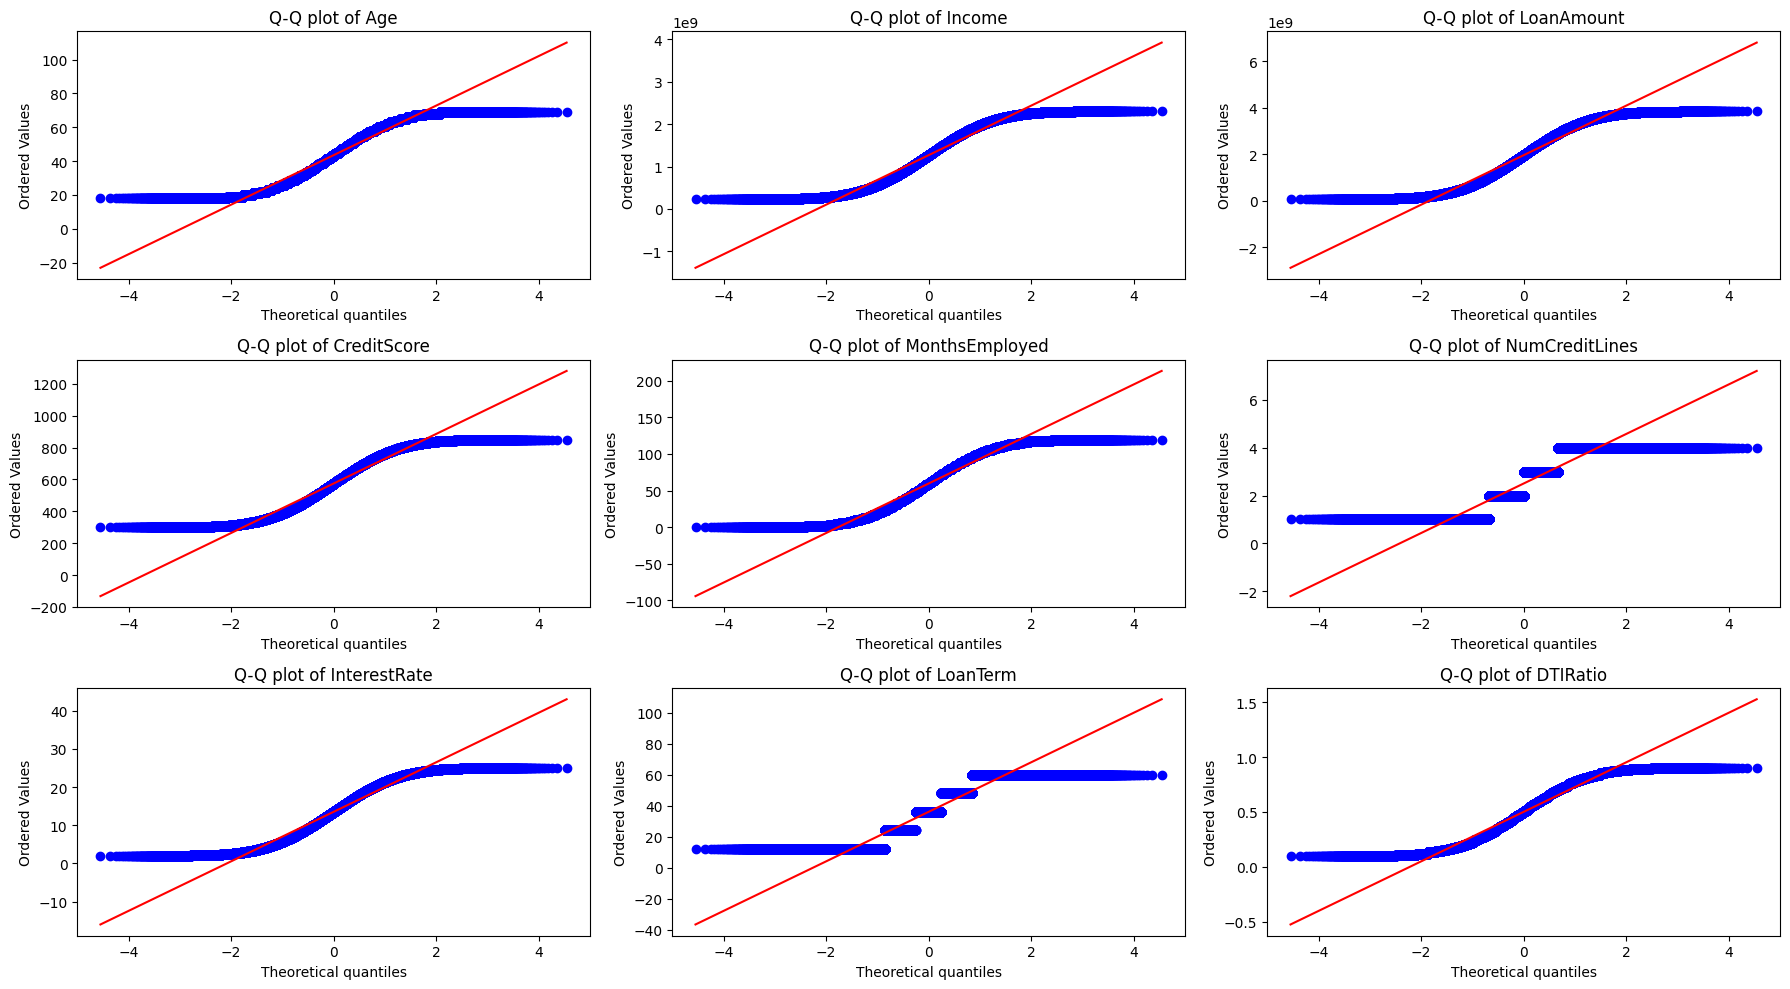

In [8]:
# List of numerical columns to analyze
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Plot Q-Q
plt.figure(figsize=(18, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
plt.tight_layout()
plt.show()

### Uji Shapiro-Wilk

Uji Shapiro-Wilk digunakan untuk menguji normalitas distribusi data. Berikut adalah implementasi uji Shapiro-Wilk untuk beberapa variabel.

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/tmp/ipykernel_256/4066653552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='p-value', data=shapiro_data, palette='viridis')
Shapiro-Wilk test for Age: Statistics=0.9538974165916443, p-value=0.0, Interpretation: Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for Income: Statistics=0.9550537467002869, p-value=0.0, Interpretation: Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for LoanAmount: Statistics=0.9544979929924011, p-value=0.0, Interpretation: Sample does not look Gaussian (reject H0)
Shapiro-Wilk test for CreditScore: Statistics=0.9546355605125427, p-value=0.0, Interpretation: Sample 

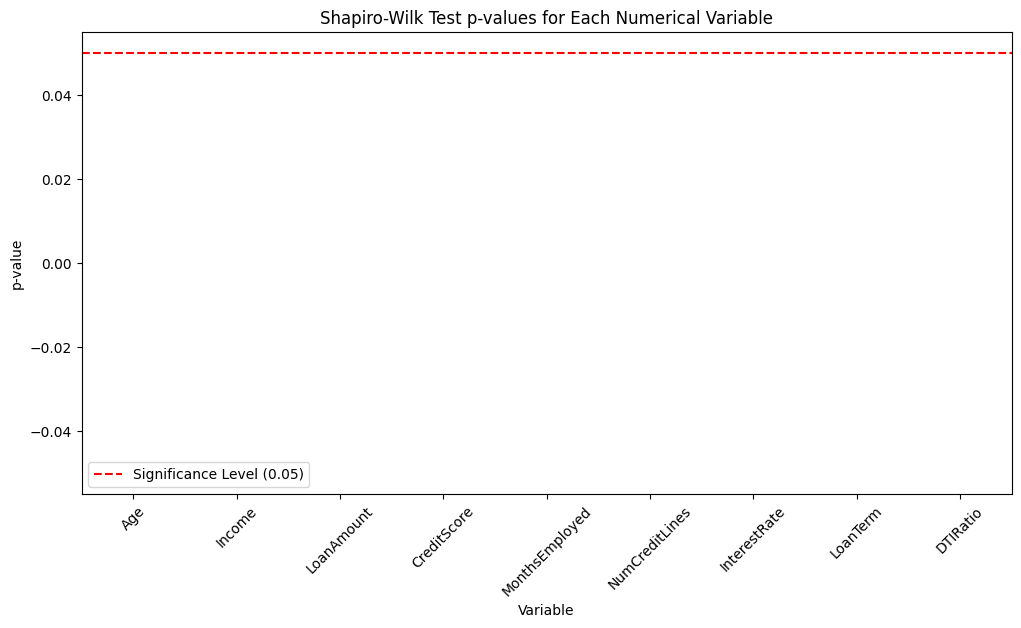

         Variable  Statistics  p-value  \
0             Age    0.953897      0.0   
1          Income    0.955054      0.0   
2      LoanAmount    0.954498      0.0   
3     CreditScore    0.954636      0.0   
4  MonthsEmployed    0.954983      0.0   
5  NumCreditLines    0.857051      0.0   
6    InterestRate    0.955167      0.0   
7        LoanTerm    0.887059      0.0   
8        DTIRatio    0.954987      0.0   

                              Interpretation  
0  Sample does not look Gaussian (reject H0)  
1  Sample does not look Gaussian (reject H0)  
2  Sample does not look Gaussian (reject H0)  
3  Sample does not look Gaussian (reject H0)  
4  Sample does not look Gaussian (reject H0)  
5  Sample does not look Gaussian (reject H0)  
6  Sample does not look Gaussian (reject H0)  
7  Sample does not look Gaussian (reject H0)  
8  Sample does not look Gaussian (reject H0)  


In [9]:
from scipy.stats import shapiro

# List of numerical columns to analyze
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Perform Shapiro-Wilk test and store results
shapiro_results = []
for col in num_cols:
    stat, p = shapiro(data[col].dropna())
    interpretation = 'Sample looks Gaussian (fail to reject H0)' if p > 0.05 else 'Sample does not look Gaussian (reject H0)'
    print(f'Shapiro-Wilk test for {col}: Statistics={stat}, p-value={p}, Interpretation: {interpretation}')
    shapiro_results.append({'Variable': col, 'Statistics': stat, 'p-value': p, 'Interpretation': interpretation})

# Convert results to DataFrame
shapiro_data = pd.DataFrame(shapiro_results)

# Plot p-values
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='p-value', data=shapiro_data, palette='viridis')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title('Shapiro-Wilk Test p-values for Each Numerical Variable')
plt.ylabel('p-value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Display Shapiro-Wilk test results
print(shapiro_data)

## Analisis Deskriptif

### Statistik Ringkasan

In [10]:
# Summary Statistics
summary = data.describe()
summary.loc['mode'] = data.mode().iloc[0]
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
summary

Age        Income    LoanAmount    CreditScore  \
count  255347.000000  2.553470e+05  2.553470e+05  255347.000000   
mean       43.498306  1.267024e+09  1.959356e+09     574.264346   
std        14.990258  5.983940e+08  1.087972e+09     158.903867   
min        18.000000  2.303700e+08  7.679000e+07     300.000000   
25%        31.000000  7.498620e+08  1.016024e+09     437.000000   
50%        43.000000  1.266513e+09  1.959005e+09     574.000000   
75%        56.000000  1.784891e+09  2.902432e+09     712.000000   
max        69.000000  2.303685e+09  3.839485e+09     849.000000   
mode       55.000000  1.067258e+09  1.465445e+09     630.000000   
range      51.000000  2.073315e+09  3.762695e+09     549.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   
mode        56.000000        2.000000      14.920000      48.000000   
range      119.000000        3.000000      23.000000      48.000000   

            DTIRatio  
count  255347.000000  
mean        0.500212  
std         0.230917  
min         0.100000  
25%         0.300000  
50%         0.500000  
75%         0.700000  
max         0.900000  
mode        0.670000  
range       0.800000

# Before Oversampling

## Visualisasi

/tmp/ipykernel_256/330544571.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


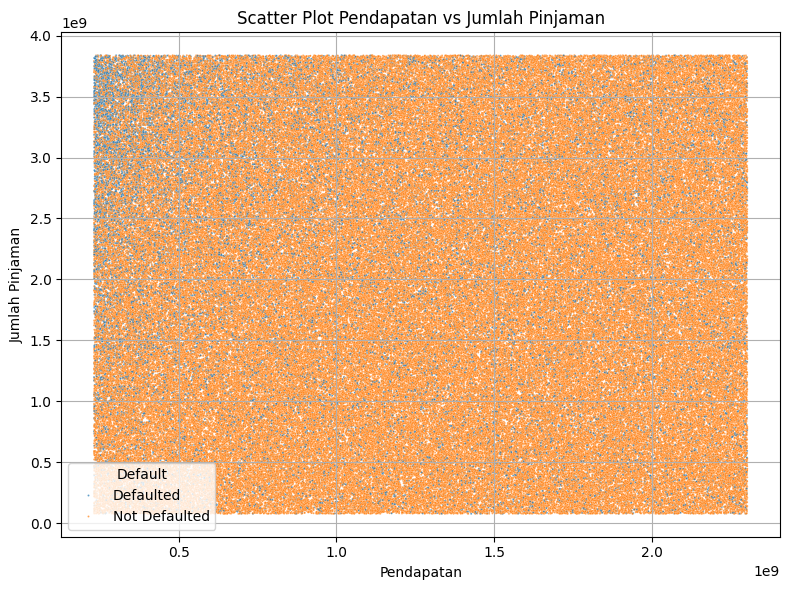

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'data' is your large DataFrame
# Sample a subset of your data
sample_size = 1000  # Adjust the sample size as needed
sampled_data = data.sample(n=sample_size, random_state=42)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='LoanAmount', data=data, s=2, color='blue', alpha=0.7,hue='Default')
plt.title('Scatter Plot Pendapatan vs Jumlah Pinjaman')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pinjaman')
plt.grid(True)
plt.tight_layout()

plt.show()

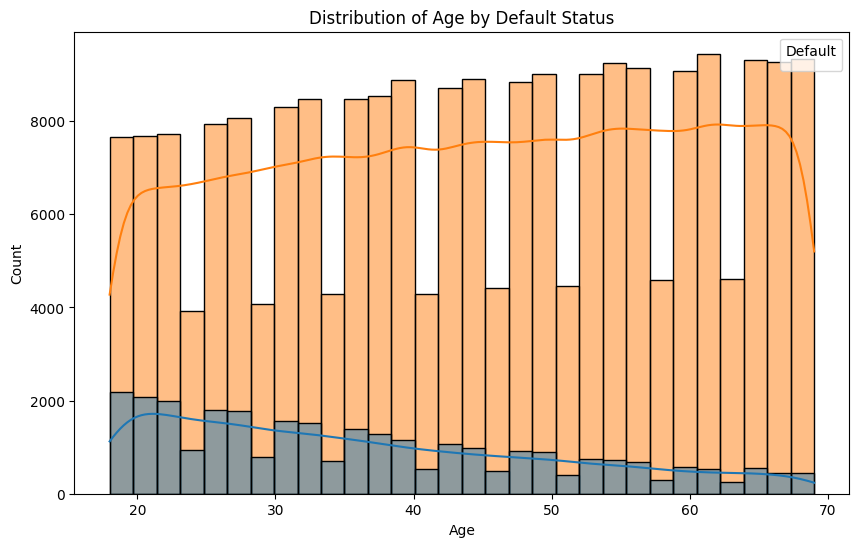

In [12]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for 'Age' separated by 'Default' status
sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Default', ax=ax)

# Set title and labels
ax.set_title('Distribution of Age by Default Status')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Add legend with specific labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Default', loc='upper right')

# Save the plot as a PNG file
plt.savefig('Age_histplot.png')

# Display the plot
plt.show()


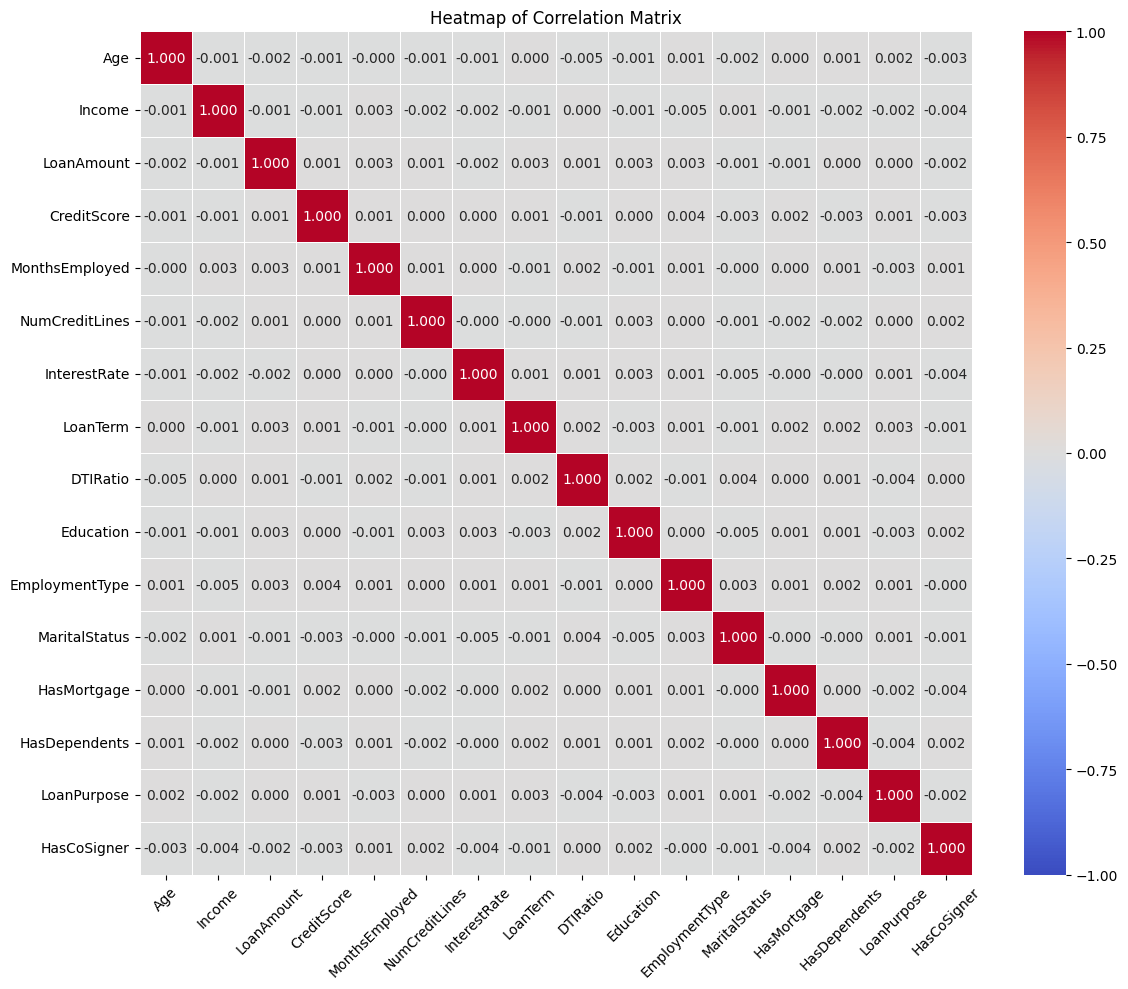

In [13]:
data_heatmap = data.copy()
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

le_dict = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_heatmap[col] = le.fit_transform(data_heatmap[col])
    le_dict[col] = le

label = data_heatmap['Default']
data_heatmap = data_heatmap.drop('Default', axis=1)
data_heatmap.drop('LoanID', axis=1,inplace=True)

# Calculate correlation matrix
corr_matrix = data_heatmap.corr()

# Create a larger heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.3f')
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('heatmap_korelasi.png')

# Display the plot
plt.show()

# Convert numeric values back to original categorical values
for col in categorical_columns:
    le = le_dict[col]
    data_heatmap[col] = le.inverse_transform(data_heatmap[col].astype(int))

In [14]:
data[data['Education'] == 'Bachelor']
# data[data['Education'] == 'Master']['Income'].mean()

# data[data['Education'] == 'PhD']['Income'].mean()

Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []

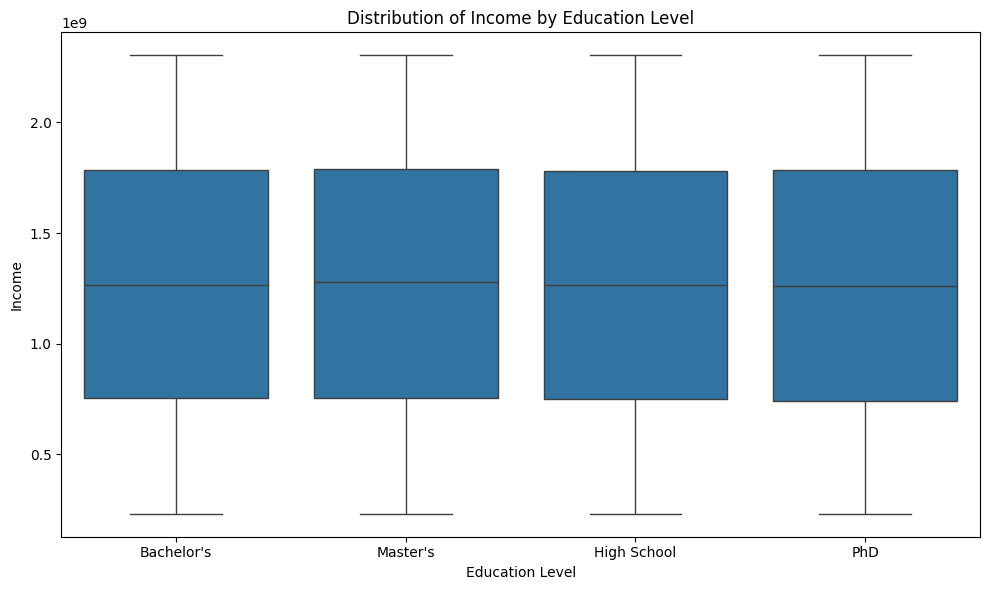

<Figure size 640x480 with 0 Axes>

In [15]:
# Buat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education', y='Income')
plt.title('Distribution of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.tight_layout()

# Tampilkan plot
plt.show()
plt.savefig('boxplot.png')

In [16]:
# # Membuat pairplot
# sns.pairplot(data)
# plt.suptitle('Pairplot of Numeric Variables', y=1.02)
# plt.show()
# plt.savefig('pairplot.png')

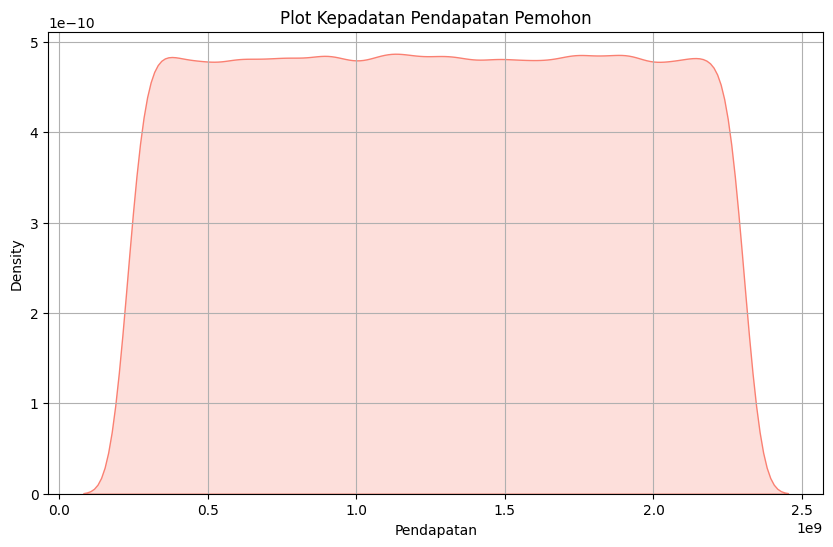

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Income'], color='salmon',fill=True)
plt.title('Plot Kepadatan Pendapatan Pemohon')
plt.xlabel('Pendapatan')
plt.ylabel('Density')
plt.grid(True)
plt.savefig('kdeplot.png')
plt.show()

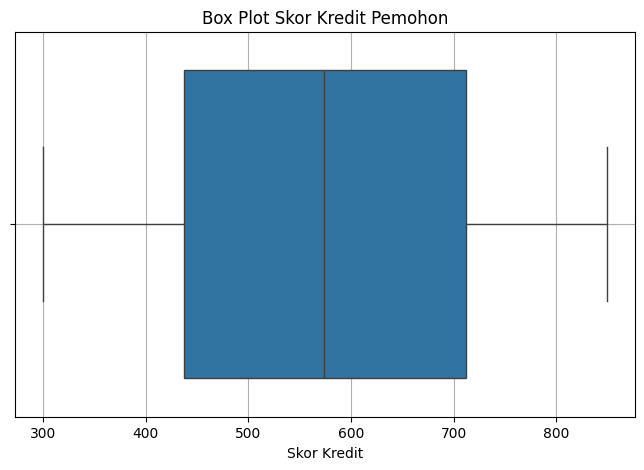

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['CreditScore'])
plt.title('Box Plot Skor Kredit Pemohon')
plt.xlabel('Skor Kredit')
plt.grid(True)
plt.savefig('boxplot_skor_kredit.png')
plt.show()

/tmp/ipykernel_256/2409502558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['MaritalStatus'], palette='Set2')


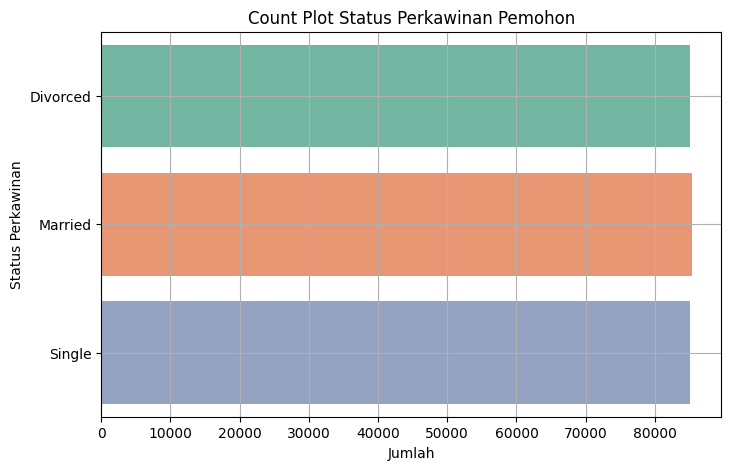

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data['MaritalStatus'], palette='Set2')
plt.title('Count Plot Status Perkawinan Pemohon')
plt.xlabel('Jumlah')
plt.ylabel('Status Perkawinan')
plt.grid(True)
plt.savefig('countplot_status_perkawinan.png')
plt.show()

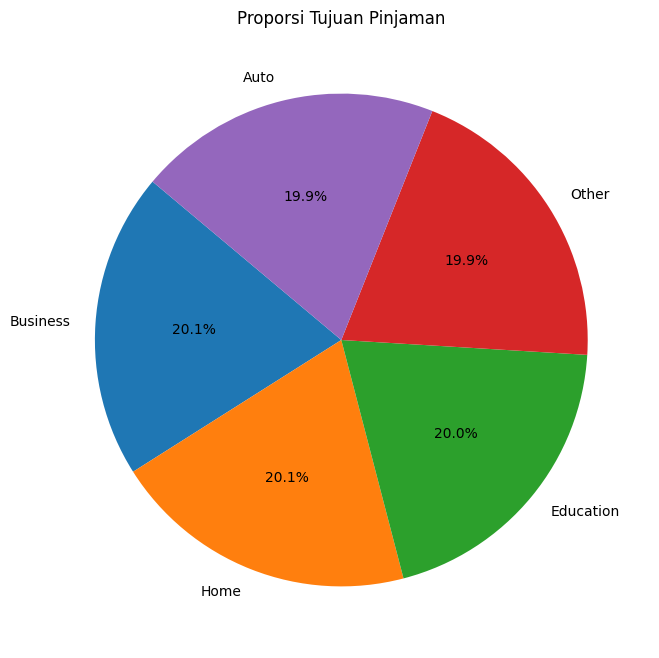

In [20]:
plt.figure(figsize=(8, 8))
labels = data['LoanPurpose'].value_counts().index
sizes = data['LoanPurpose'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Tujuan Pinjaman')
plt.savefig('proporsi_tujuan_pinjaman.png')
plt.show()

                 Age        Income    LoanAmount    CreditScore  \
count  255347.000000  2.553470e+05  2.553470e+05  255347.000000   
mean       43.498306  1.267024e+09  1.959356e+09     574.264346   
std        14.990258  5.983940e+08  1.087972e+09     158.903867   
min        18.000000  2.303700e+08  7.679000e+07     300.000000   
25%        31.000000  7.498620e+08  1.016024e+09     437.000000   
50%        43.000000  1.266513e+09  1.959005e+09     574.000000   
75%        56.000000  1.784891e+09  2.902432e+09     712.000000   
max        69.000000  2.303685e+09  3.839485e+09     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000    

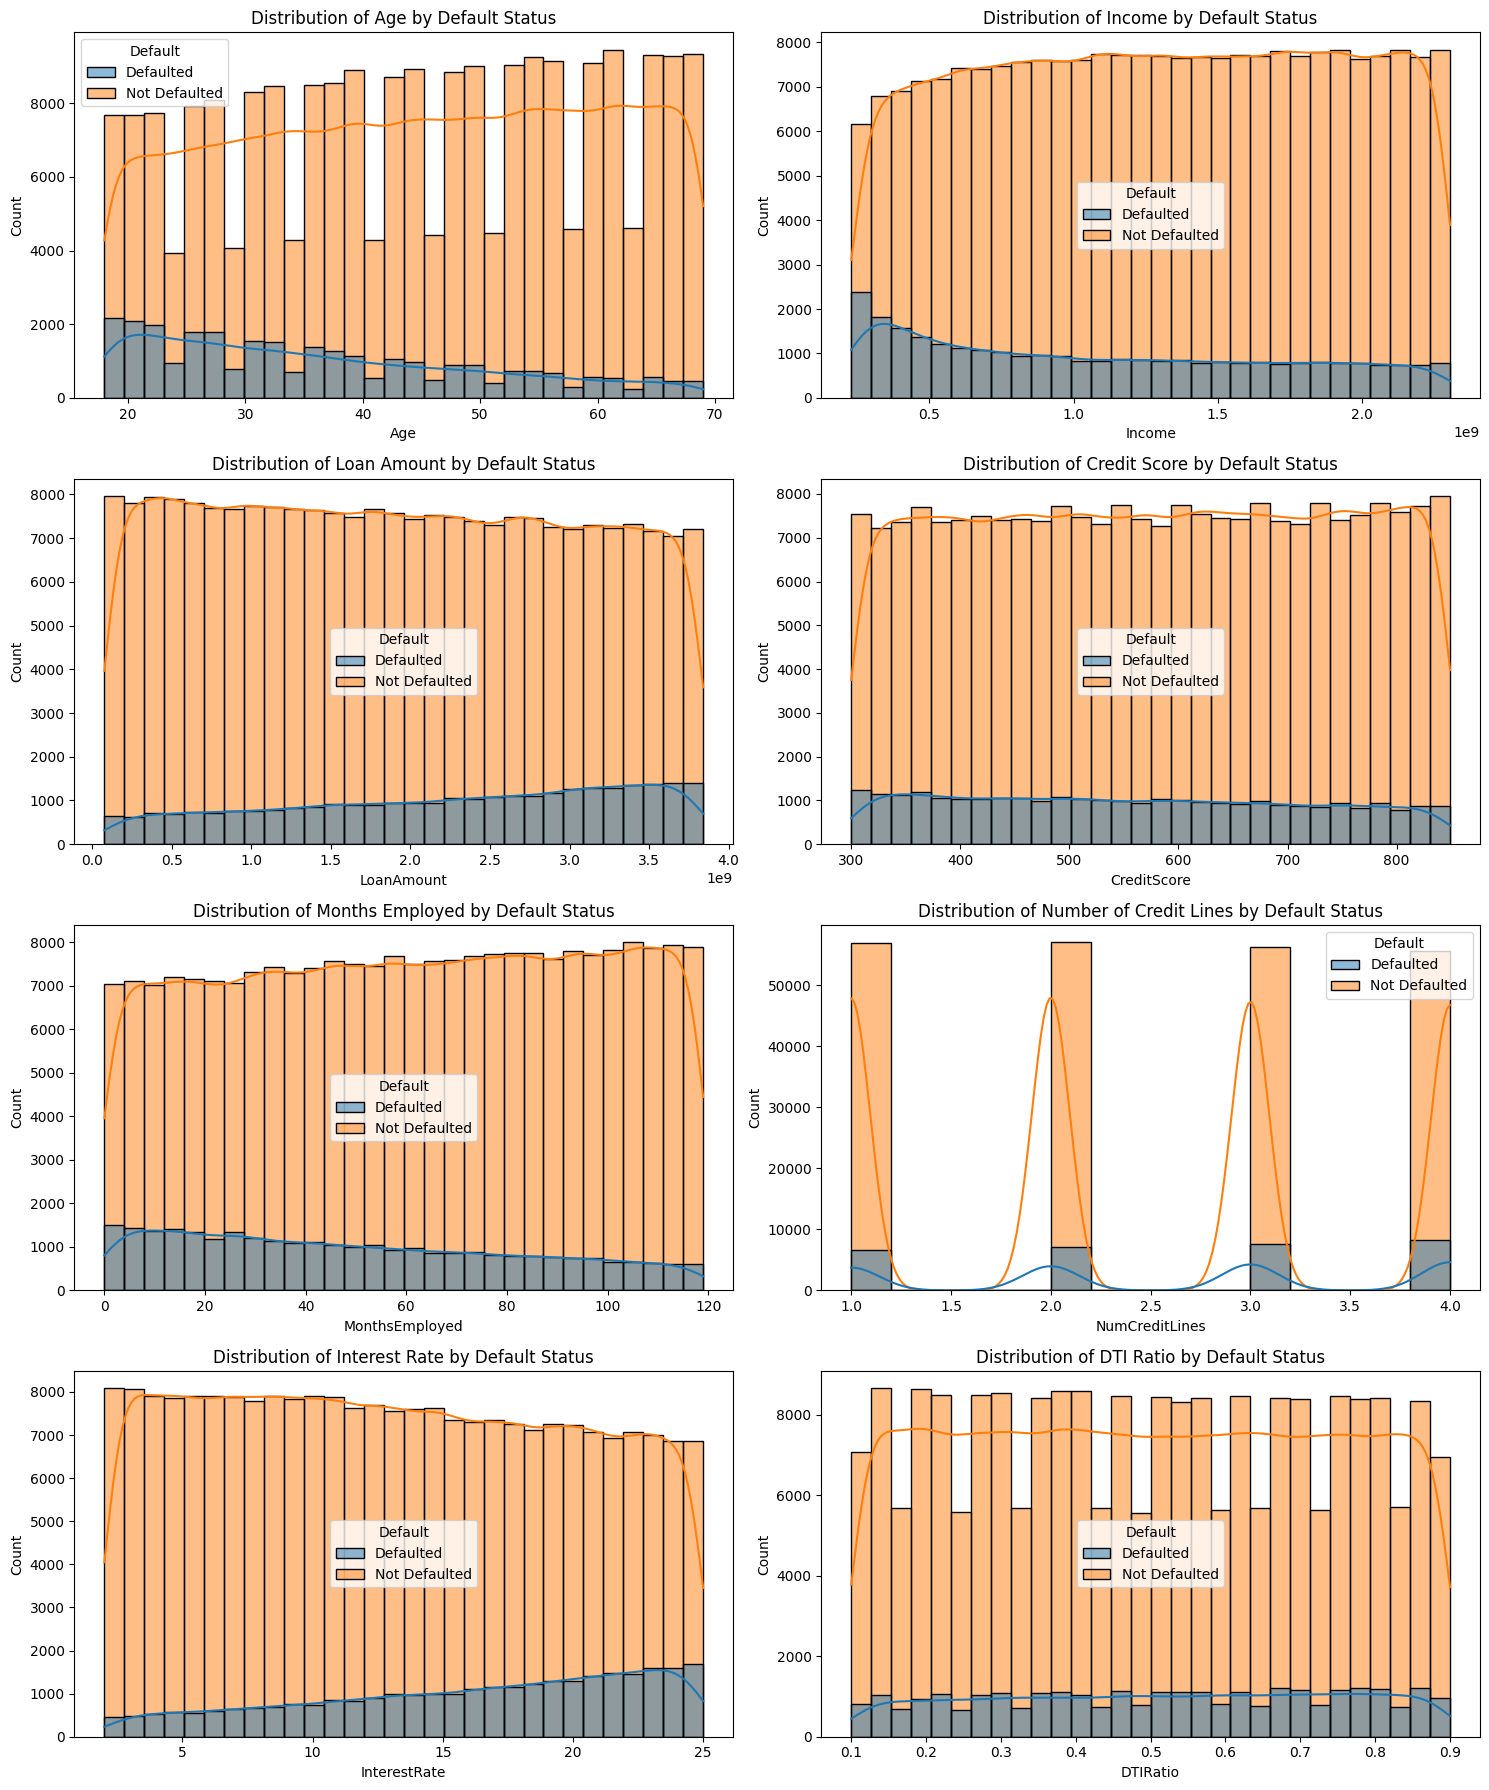

In [21]:
# Assuming 'data' is already loaded into a DataFrame
print(data.describe())

# Plot histograms for numerical features separated by 'Default' status
fig, axs = plt.subplots(4, 2, figsize=(15, 18))

sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Default', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age by Default Status')

sns.histplot(data=data, x='Income', bins=30, kde=True, hue='Default', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Income by Default Status')

sns.histplot(data=data, x='LoanAmount', bins=30, kde=True, hue='Default', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Loan Amount by Default Status')

sns.histplot(data=data, x='CreditScore', bins=30, kde=True, hue='Default', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Credit Score by Default Status')

sns.histplot(data=data, x='MonthsEmployed', bins=30, kde=True, hue='Default', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Months Employed by Default Status')

sns.histplot(data=data, x='NumCreditLines', bins=15, kde=True, hue='Default', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Number of Credit Lines by Default Status')

sns.histplot(data=data, x='InterestRate', bins=30, kde=True, hue='Default', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of Interest Rate by Default Status')

sns.histplot(data=data, x='DTIRatio', bins=30, kde=True, hue='Default', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of DTI Ratio by Default Status')

plt.tight_layout()
plt.show()

## Univariate

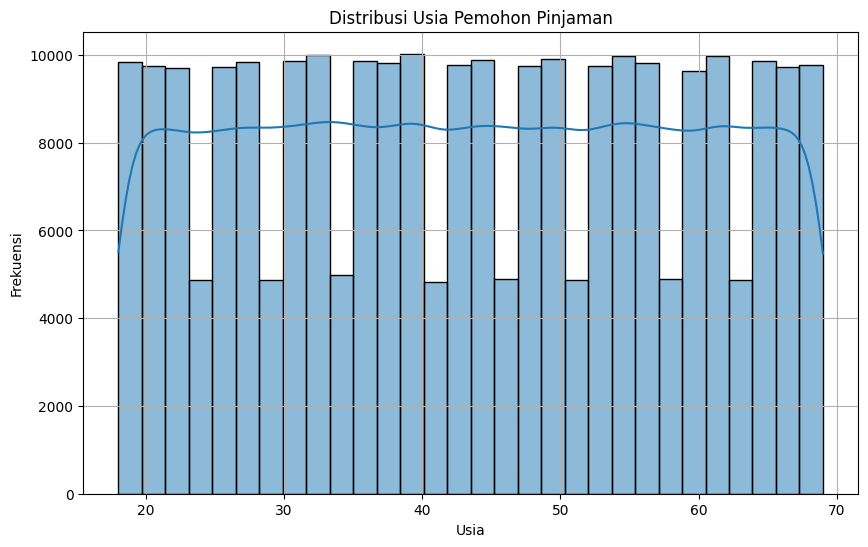

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
axs[0, 0].set_title('Distribution of Age by Default Status')
plt.title('Distribusi Usia Pemohon Pinjaman')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig('histogram_usia.png')
plt.show()

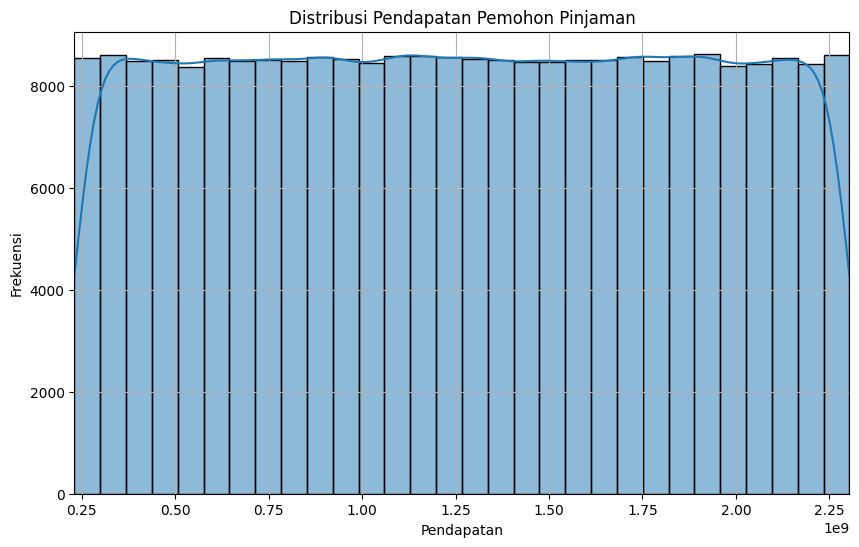

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan data['Income'] adalah kolom yang berisi data pendapatan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)

# Menambahkan judul dan label
plt.title('Distribusi Pendapatan Pemohon Pinjaman')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')

# Mengatur batas sumbu x agar sesuai dengan rentang data yang diberikan
plt.xlim(data['Income'].min(), data['Income'].max())

# Menambahkan grid untuk membantu interpretasi
plt.grid(True)

# Menyimpan gambar histogram ke file
plt.savefig('histogram_pendapatan.png')

# Menampilkan histogram
plt.show()
#le9 = miliar

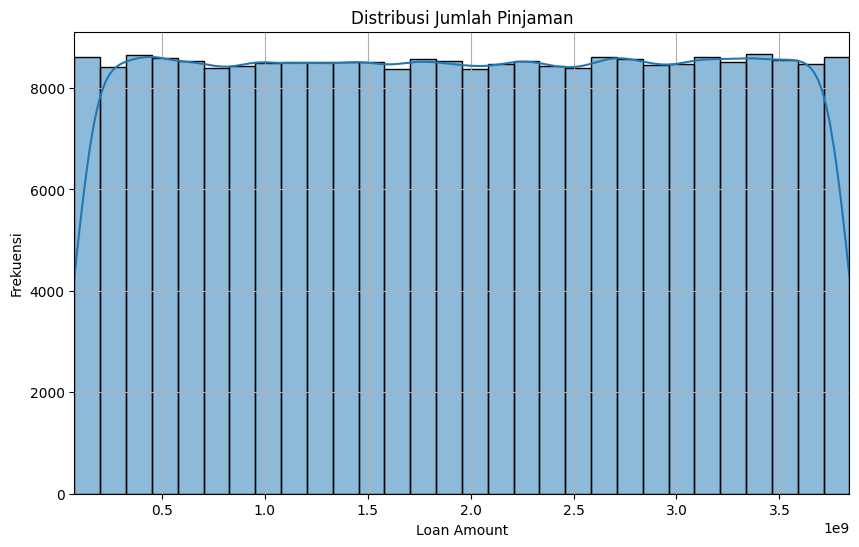

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LoanAmount', bins=30, kde=True)
axs[0, 0].set_title('Distribution of Loan Amount by Default Status')
plt.title('Distribusi Jumlah Pinjaman')
plt.xlabel('Loan Amount')
plt.ylabel('Frekuensi')
plt.xlim(data['LoanAmount'].min(), data['LoanAmount'].max())
plt.grid(True)
plt.savefig('histogram_LoanAmount.png')
plt.show()

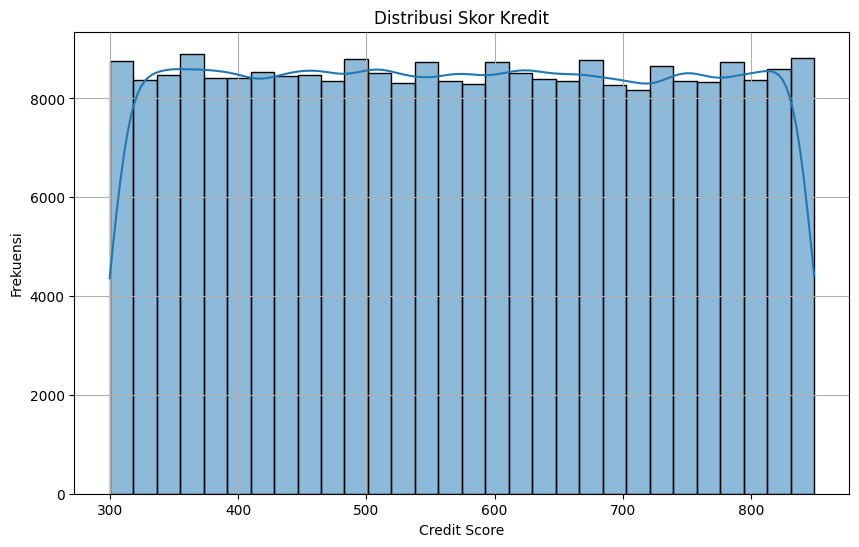

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CreditScore', bins=30, kde=True)
axs[0, 0].set_title('Distribution of Loan Amount by Default Status')
plt.title('Distribusi Skor Kredit')
plt.xlabel('Credit Score')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig('histogram_CreditScore.png')
plt.show()

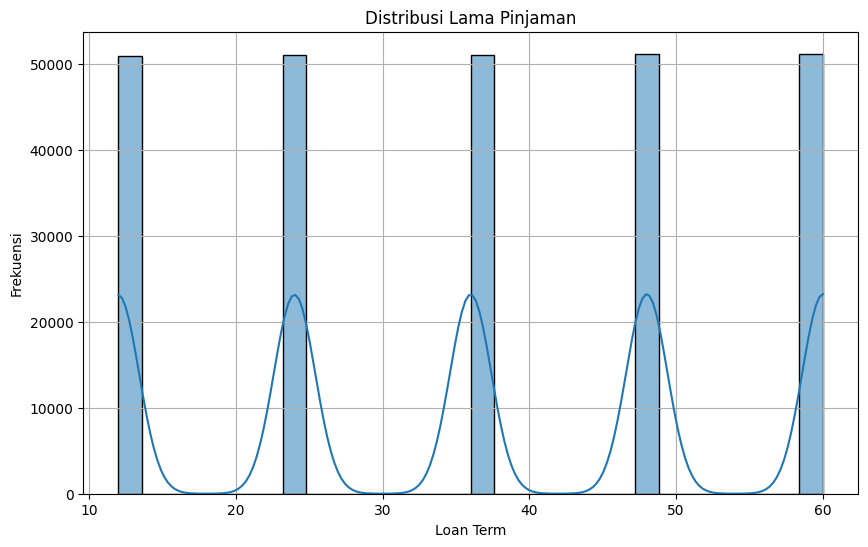

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LoanTerm', bins=30, kde=True)
axs[0, 0].set_title('Distribution of Loan Term by Default Status')
plt.title('Distribusi Lama Pinjaman')
plt.xlabel('Loan Term')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig('histogram_LoanTerm.png')
plt.show()

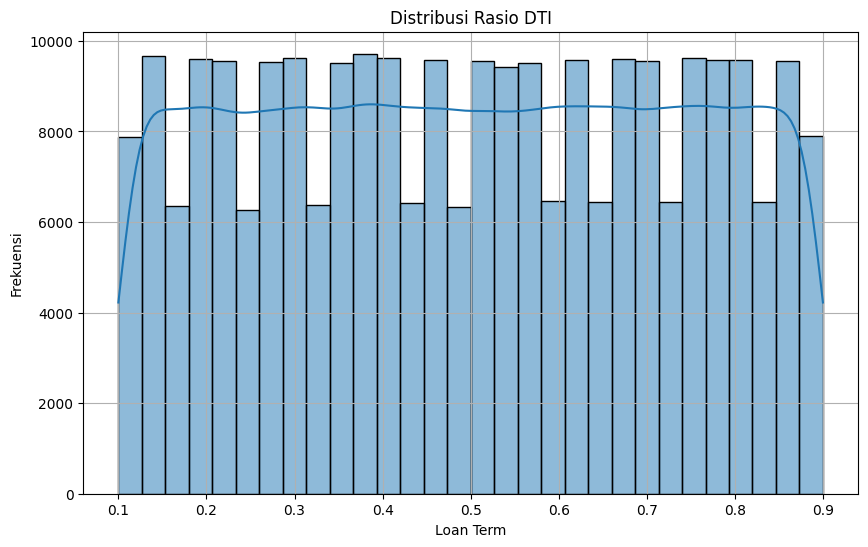

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DTIRatio', bins=30, kde=True)
axs[0, 0].set_title('Distribution of Debt-to-Income Ratio')
plt.title('Distribusi Rasio DTI')
plt.xlabel('Loan Term')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.savefig('histogram_DTI.png')
plt.show()

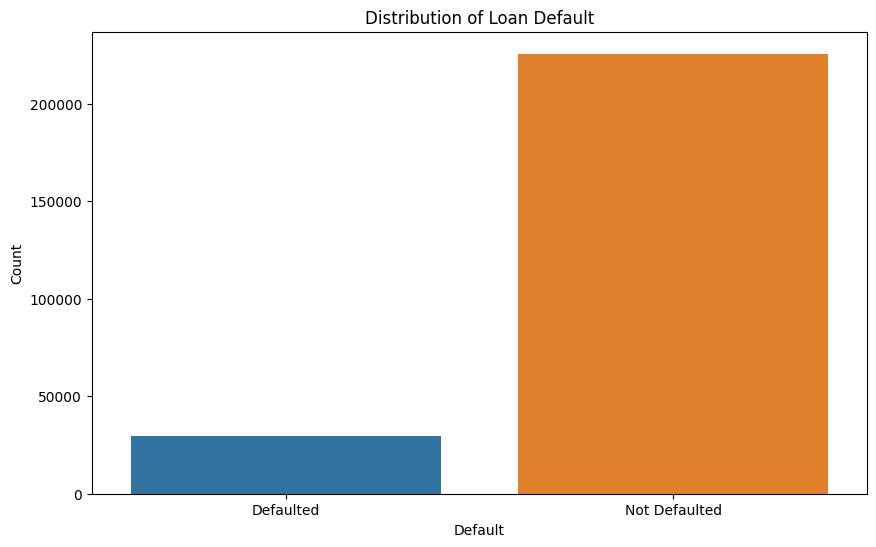

In [24]:
default_df = data['Default'].value_counts().reset_index()
default_df.columns = ['Default', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Default', y='Count',hue='Default', data=default_df)
plt.title('Distribution of Loan Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

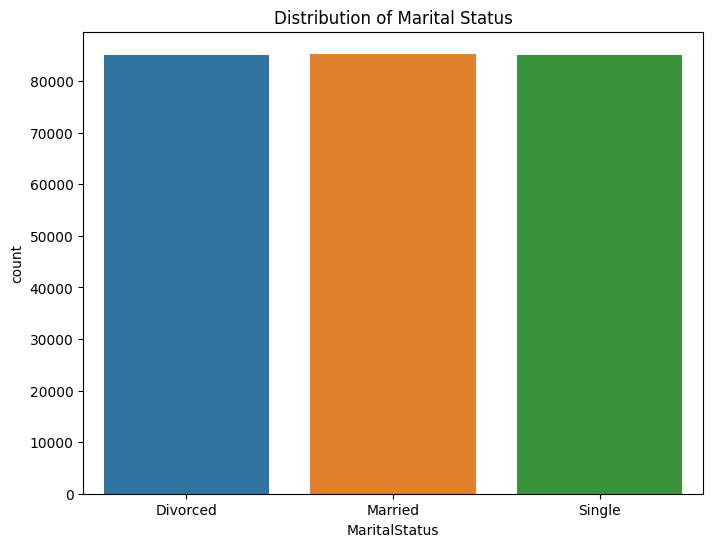

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='MaritalStatus', hue='MaritalStatus')
plt.title('Distribution of Marital Status')
plt.show()

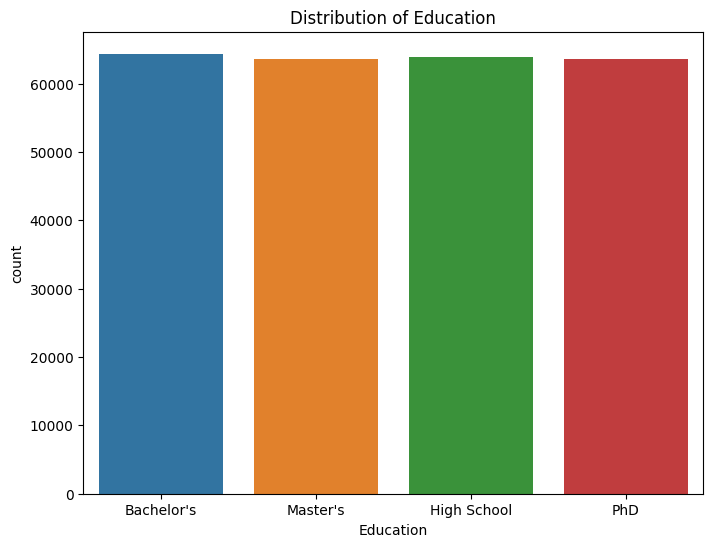

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Education', hue='Education')
plt.title('Distribution of Education')
plt.show()

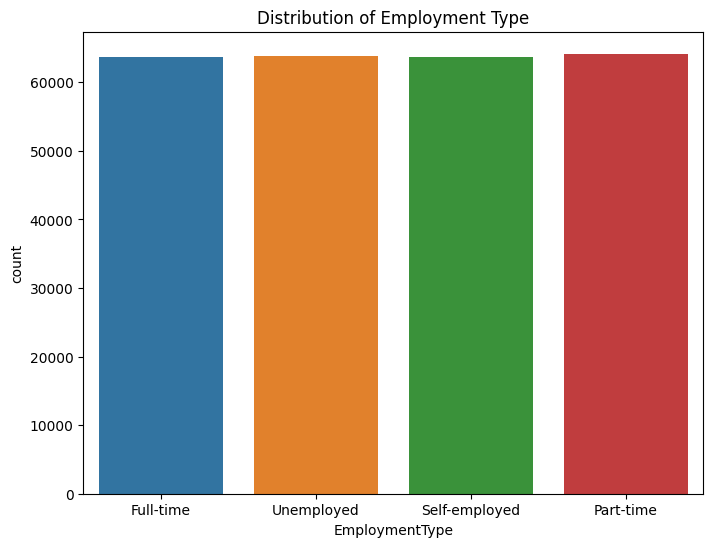

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='EmploymentType', hue='EmploymentType')
plt.title('Distribution of Employment Type')
plt.show()

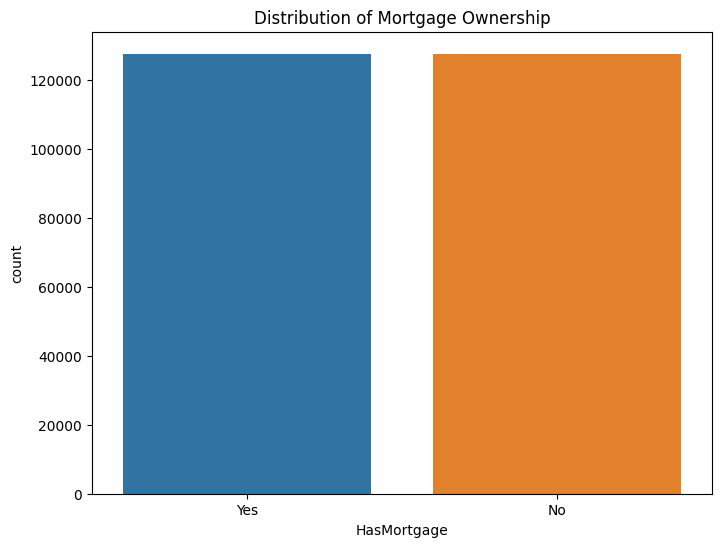

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasMortgage', hue='HasMortgage')
plt.title('Distribution of Mortgage Ownership')
plt.show()

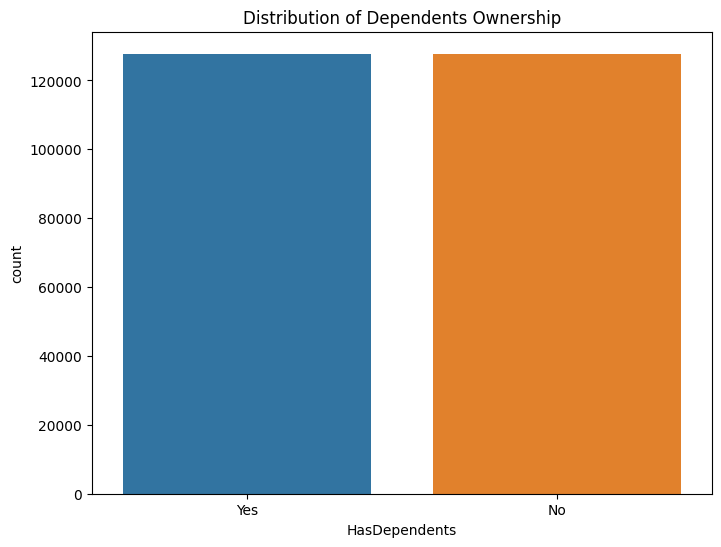

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasDependents', hue='HasDependents')
plt.title('Distribution of Dependents Ownership')
plt.show()

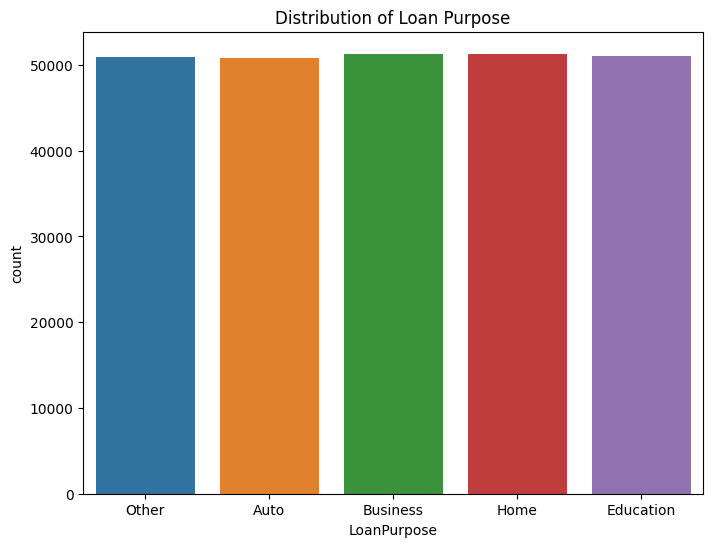

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='LoanPurpose', hue='LoanPurpose')
plt.title('Distribution of Loan Purpose')
plt.show()

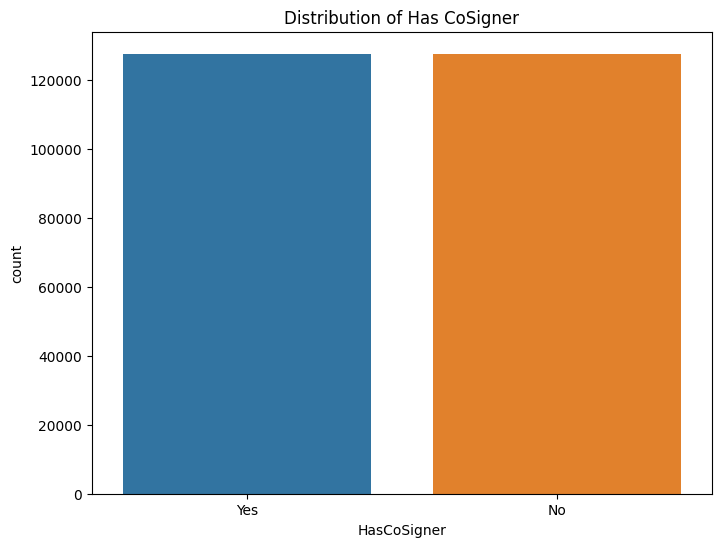

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasCoSigner', hue='HasCoSigner')
plt.title('Distribution of Has CoSigner')
plt.show()

## Multivariate Analysis

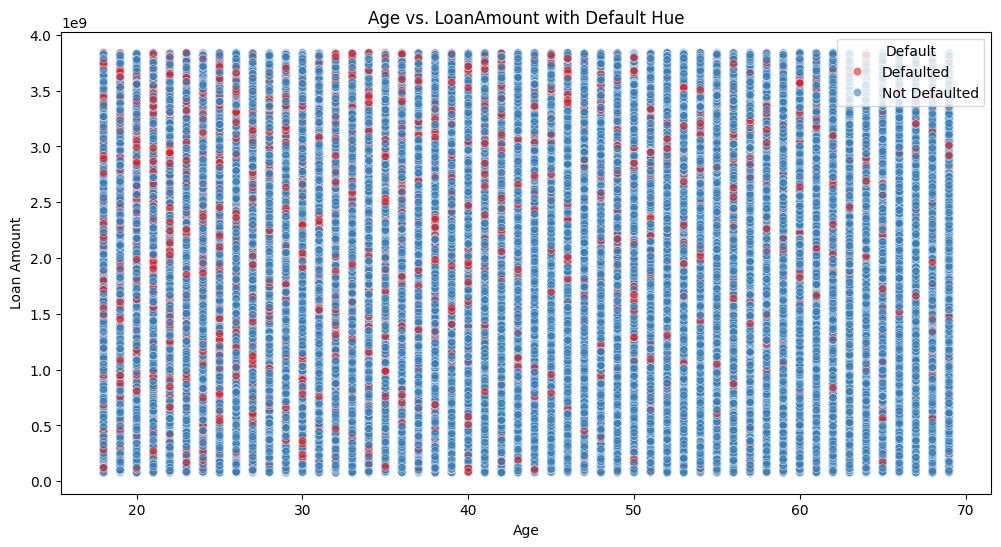

In [32]:
# Scatter plot Age vs. LoanAmount dengan hue Default
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='LoanAmount', hue='Default', data=data, alpha=0.6, palette='Set1')
plt.title('Age vs. LoanAmount with Default Hue')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.legend(title='Default', loc='upper right')
plt.show()

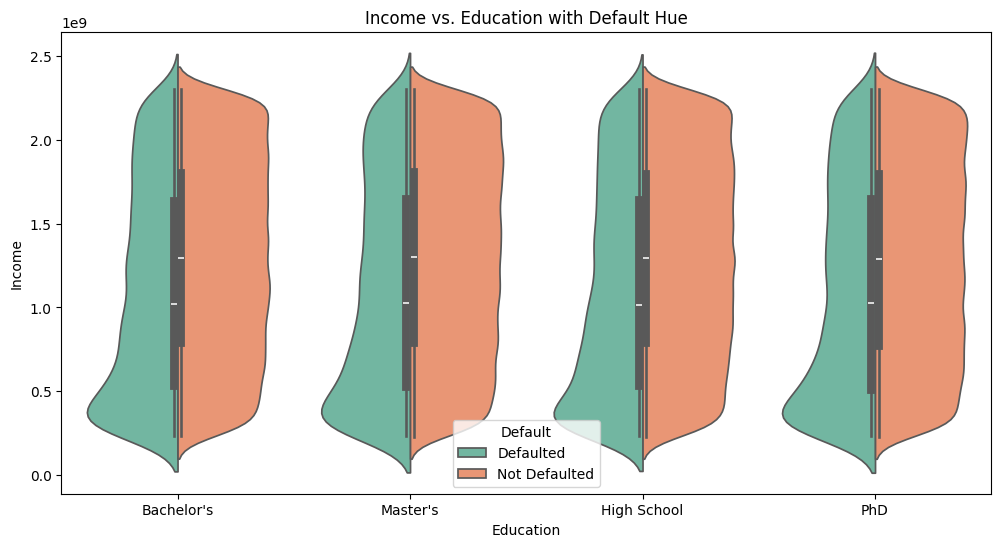

In [33]:
# Violin plot Income vs. Education dengan hue Default
plt.figure(figsize=(12, 6))
sns.violinplot(x='Education', y='Income', hue='Default', data=data, split=True, palette='Set2')
plt.title('Income vs. Education with Default Hue')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

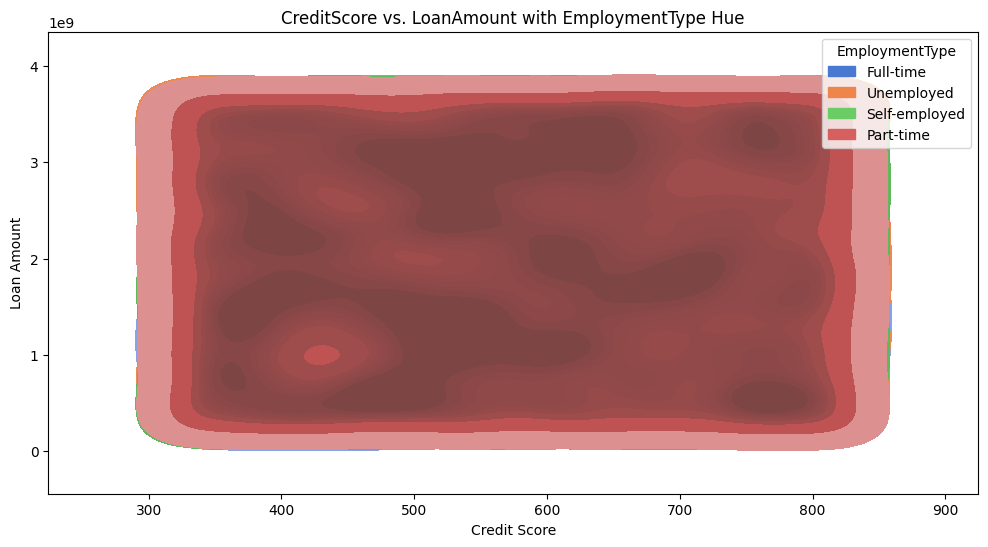

In [34]:
# KDE plot CreditScore vs. LoanAmount dengan hue EmploymentType
plt.figure(figsize=(12, 6))
sns.kdeplot(x='CreditScore', y='LoanAmount', hue='EmploymentType', data=data, fill=True, palette='muted')
plt.title('CreditScore vs. LoanAmount with EmploymentType Hue')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount')
plt.show()

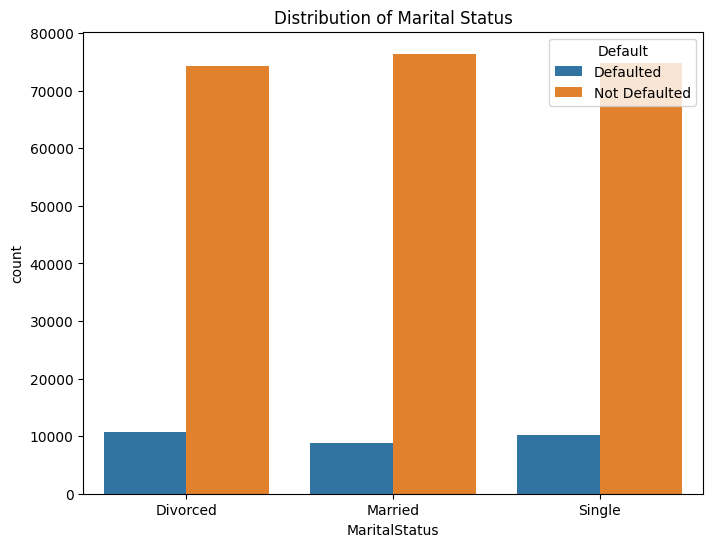

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='MaritalStatus',hue='Default')
plt.title('Distribution of Marital Status')
plt.show()

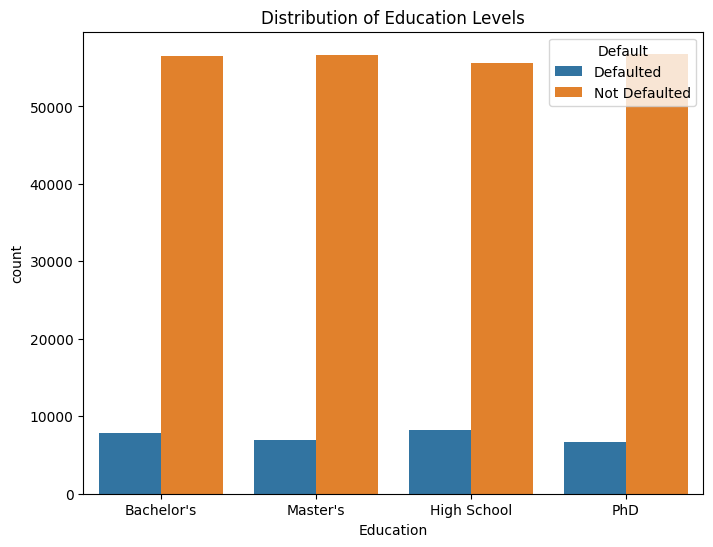

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Education',hue='Default')
plt.title('Distribution of Education Levels')
plt.show()

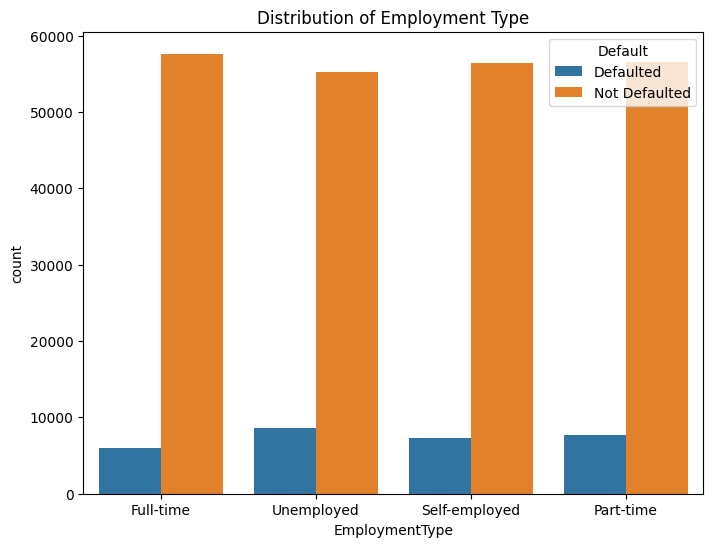

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='EmploymentType', hue='Default')
plt.title('Distribution of Employment Type')
plt.show()

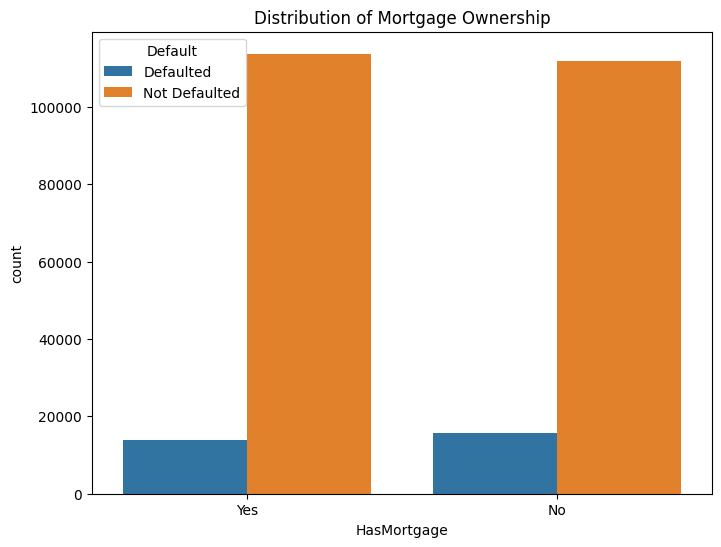

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasMortgage', hue='Default')
plt.title('Distribution of Mortgage Ownership')
plt.show()

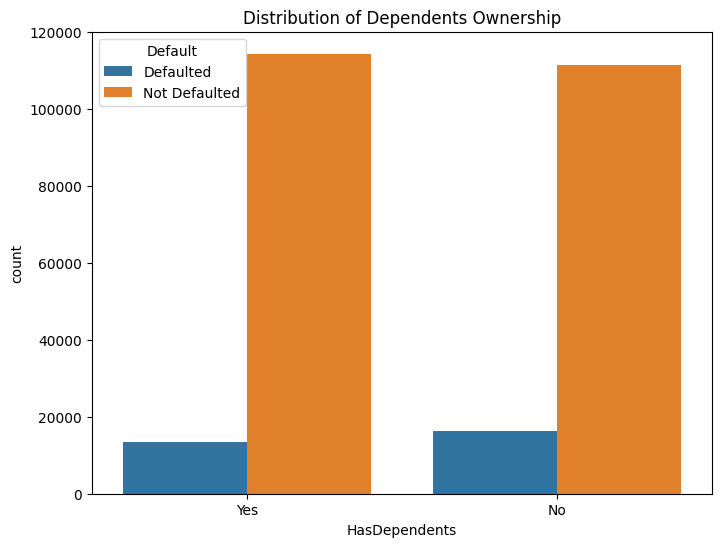

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasDependents', hue='Default')
plt.title('Distribution of Dependents Ownership')
plt.show()

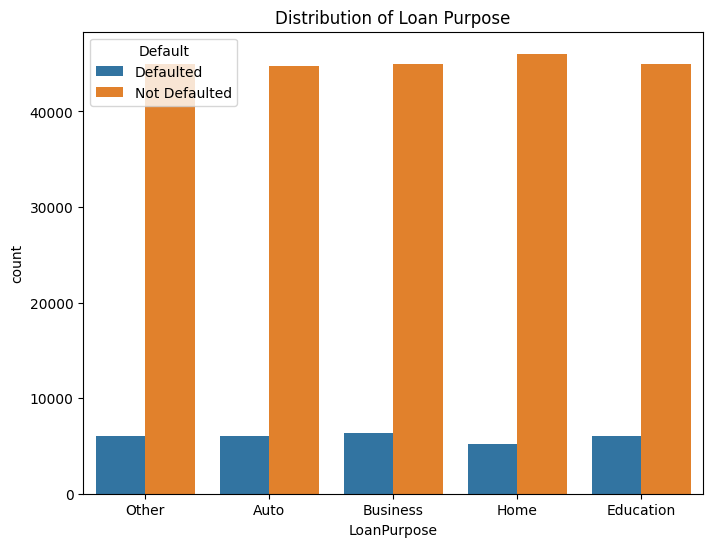

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='LoanPurpose', hue='Default')
plt.title('Distribution of Loan Purpose')
plt.show()

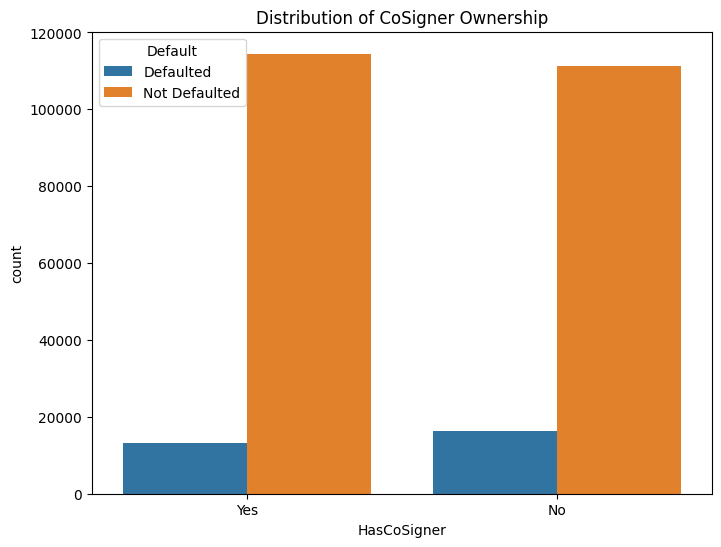

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='HasCoSigner', hue='Default')
plt.title('Distribution of CoSigner Ownership')
plt.show()

# Preprocess

In [42]:
data_convert = data.copy()
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

le_dict = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_convert[col] = le.fit_transform(data_convert[col])
    le_dict[col] = le

label = data_convert['Default']
data_convert = data_convert.drop('Default', axis=1)
data_convert.drop('LoanID', axis=1,inplace=True)

In [43]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_convert, label)

X_resampled.reset_index()
y_resampled.reset_index()
# Combine resampled features and target into a new DataFrame
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [44]:
# Convert numeric values back to original categorical values
for col in categorical_columns:
    le = le_dict[col]
    resampled_data[col] = le.inverse_transform(resampled_data[col].astype(int))

# After Oversampling

/tmp/ipykernel_256/25372923.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


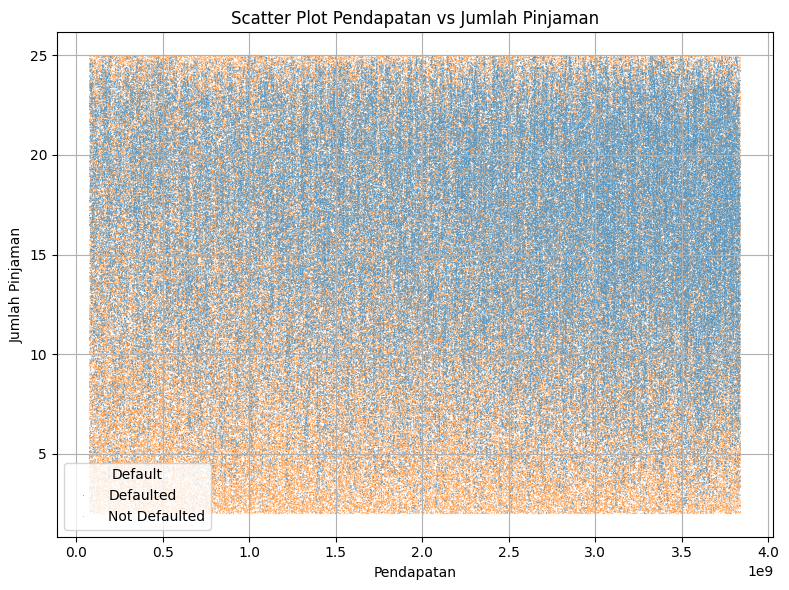

In [45]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='InterestRate', data=resampled_data, s=0.6, color='blue', alpha=0.7,hue='Default')
plt.title('Scatter Plot Pendapatan vs Jumlah Pinjaman')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pinjaman')
plt.grid(True)
plt.tight_layout()
plt.show()

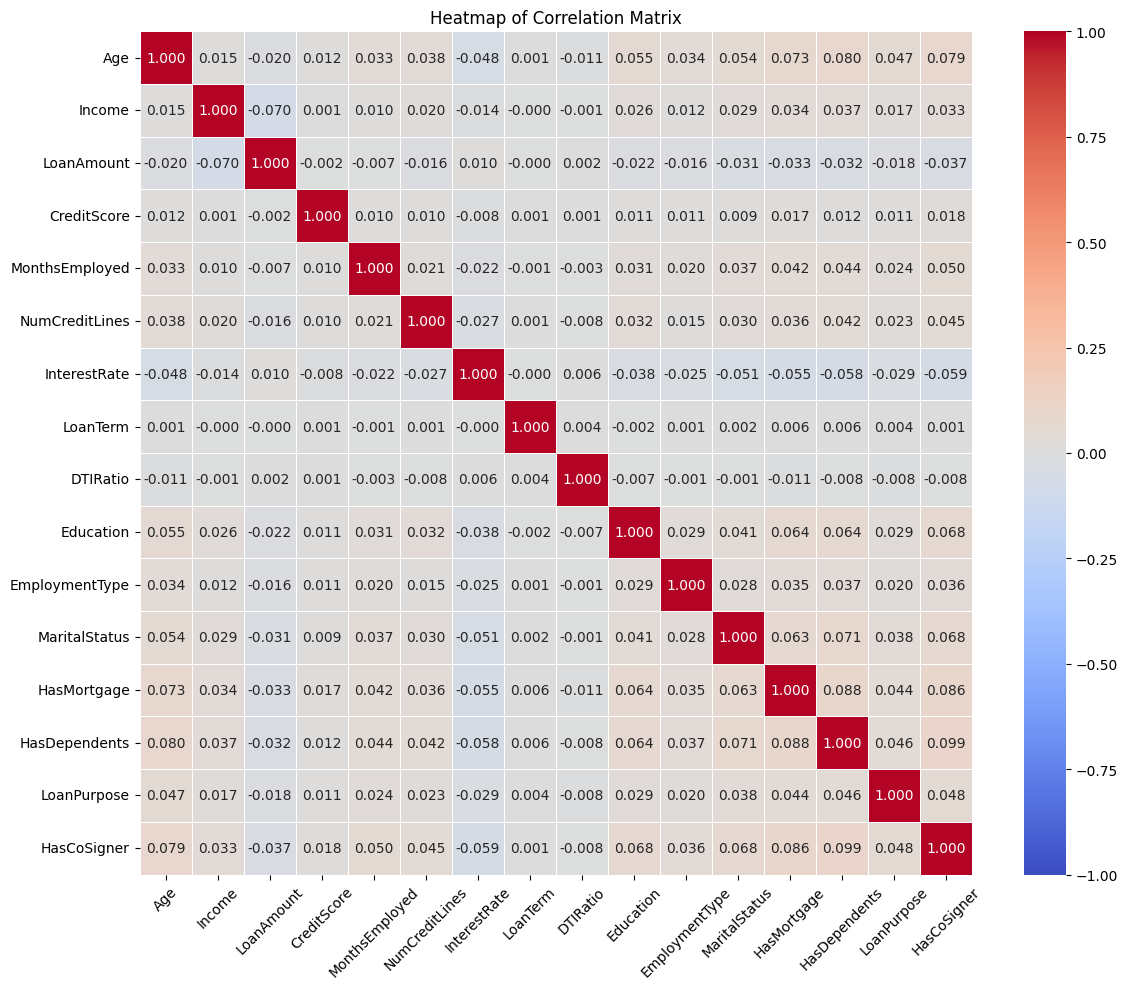

In [46]:
# Assuming 'resampled_data' is your DataFrame with numerical and categorical columns
# Replace this with your actual resampled data and categorical columns
data_heatmap = resampled_data.copy()
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

le_dict = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_heatmap[col] = le.fit_transform(data_heatmap[col])
    le_dict[col] = le

label = data_heatmap['Default']
data_heatmap = data_heatmap.drop('Default', axis=1)

# Calculate correlation matrix
corr_matrix = data_heatmap.corr()

# Create a larger heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.3f')
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('heatmap_korelasi.png')

# Display the plot
plt.show()

# Convert numeric values back to original categorical values
for col in categorical_columns:
    le = le_dict[col]
    data_heatmap[col] = le.inverse_transform(data_heatmap[col].astype(int))

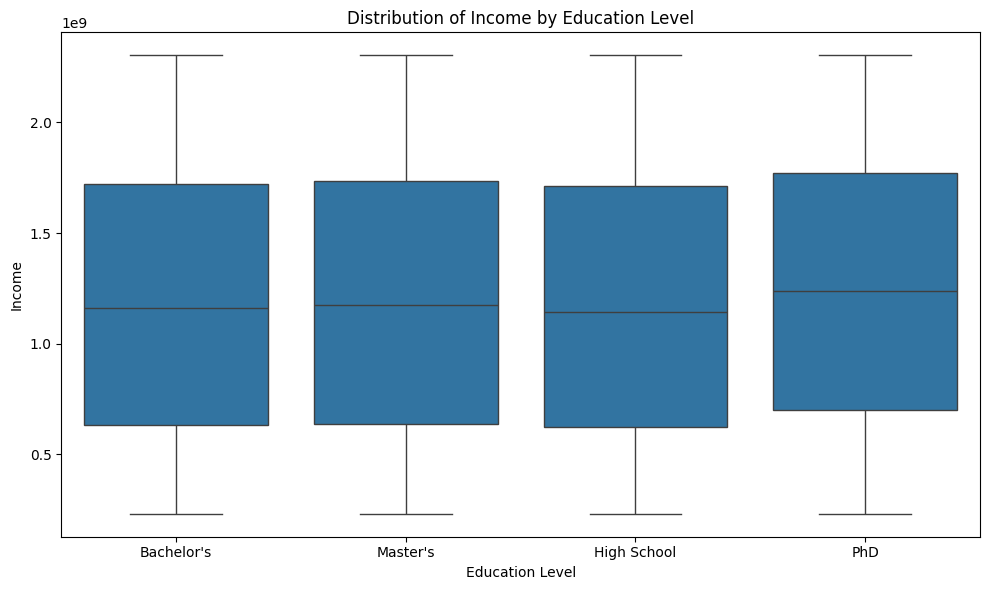

<Figure size 640x480 with 0 Axes>

In [47]:
# Buat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=resampled_data, x='Education', y='Income')
plt.title('Distribution of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.tight_layout()

# Tampilkan plot
plt.show()
plt.savefig('boxplot_over.png')

## Distribution of data

Plot histograms for numerical features separated by 'Default' status

                 Age        Income    LoanAmount    CreditScore  \
count  451388.000000  4.513880e+05  4.513880e+05  451388.000000   
mean       40.259907  1.195958e+09  2.072140e+09     567.342262   
std        14.024255  6.161694e+08  1.086132e+09     147.016782   
min        18.000000  2.303700e+08  7.679000e+07     300.000000   
25%        28.000000  6.414422e+08  1.148917e+09     446.000000   
50%        39.000000  1.170428e+09  2.128872e+09     564.000000   
75%        51.000000  1.731845e+09  3.030593e+09     687.000000   
max        69.000000  2.303685e+09  3.839485e+09     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count    451388.00000   451388.000000  451388.000000  451388.000000   
mean         55.31478        2.377256      14.536246      35.885232   
std          32.16730        1.044666       6.152568      15.702246   
min           0.00000        1.000000       2.000000      12.000000   
25%          28.00000        1.000000    

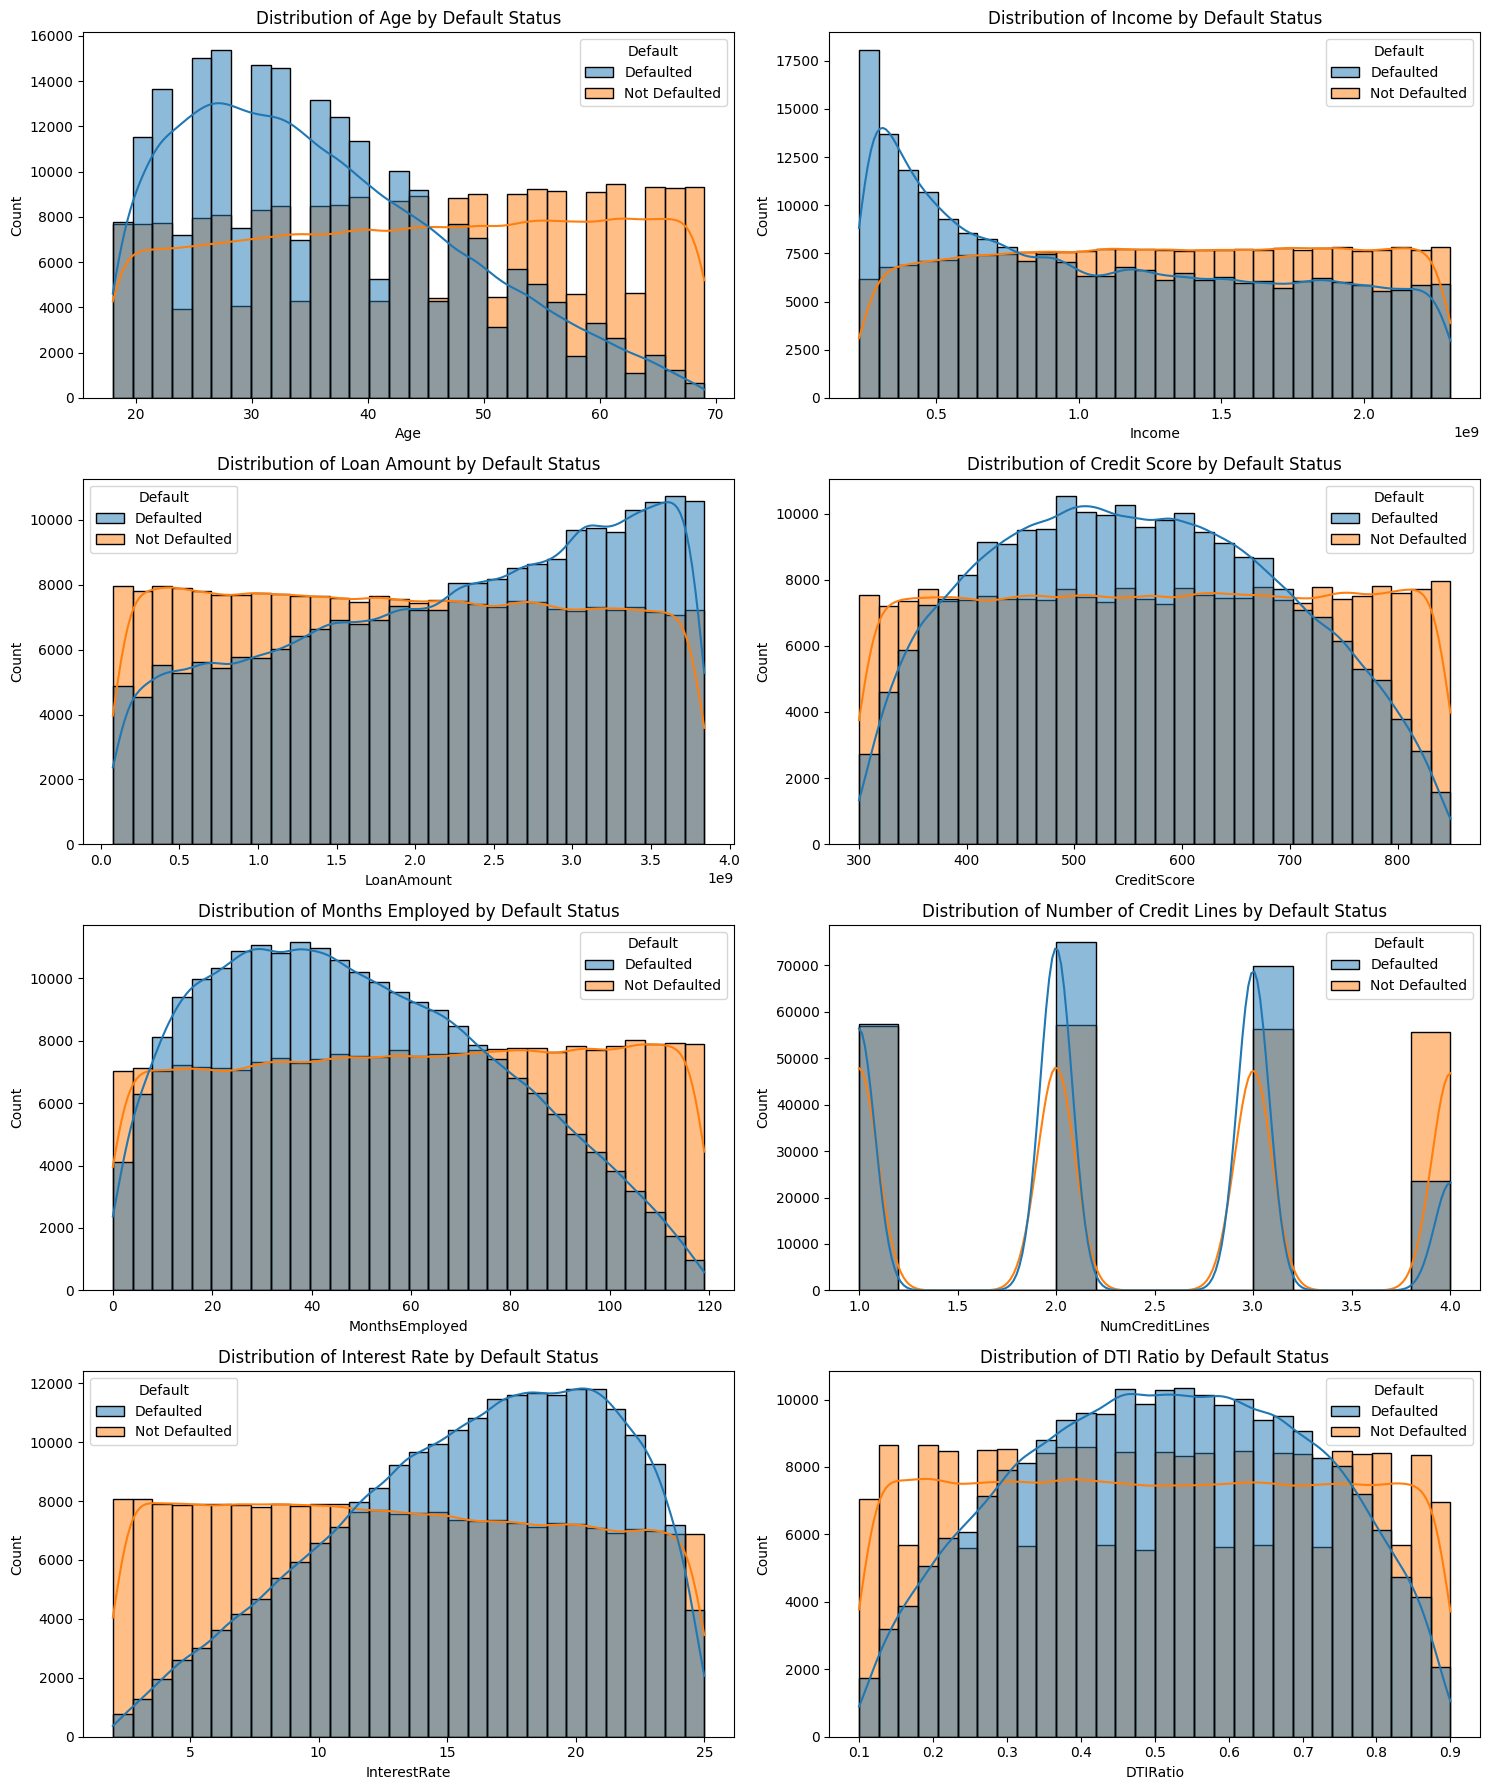

In [48]:
print(resampled_data.describe())
fig, axs = plt.subplots(4, 2, figsize=(15, 18))

sns.histplot(data=resampled_data, x='Age', bins=30, kde=True, hue='Default', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age by Default Status')

sns.histplot(data=resampled_data, x='Income', bins=30, kde=True, hue='Default', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Income by Default Status')

sns.histplot(data=resampled_data, x='LoanAmount', bins=30, kde=True, hue='Default', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Loan Amount by Default Status')

sns.histplot(data=resampled_data, x='CreditScore', bins=30, kde=True, hue='Default', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Credit Score by Default Status')

sns.histplot(data=resampled_data, x='MonthsEmployed', bins=30, kde=True, hue='Default', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Months Employed by Default Status')

sns.histplot(data=resampled_data, x='NumCreditLines', bins=15, kde=True, hue='Default', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Number of Credit Lines by Default Status')

sns.histplot(data=resampled_data, x='InterestRate', bins=30, kde=True, hue='Default', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of Interest Rate by Default Status')

sns.histplot(data=resampled_data, x='DTIRatio', bins=30, kde=True, hue='Default', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of DTI Ratio by Default Status')

plt.tight_layout()
plt.show()

# Univariate Analysis

Distribusi Jenis Kelamin: Bagaimana distribusi pemohon pinjaman berdasarkan Status Pernikahan?

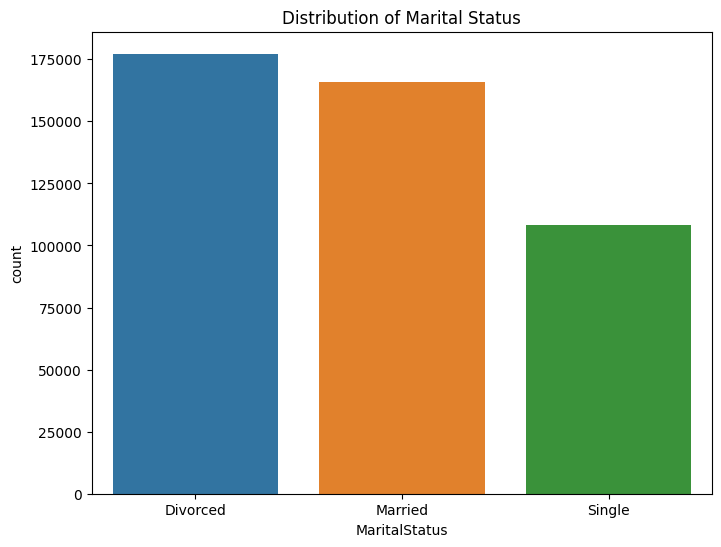

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='MaritalStatus', hue='MaritalStatus')
plt.title('Distribution of Marital Status')
plt.show()

Pemohon pinjaman yang sudah menikah lebih banyak daripada yang belum menikah. Ini bisa menunjukkan bahwa orang yang sudah menikah lebih cenderung membutuhkan pinjaman, mungkin untuk kebutuhan rumah tangga atau investasi.

### Education

Tingkat Pendidikan: Bagaimana distribusi tingkat pendidikan (Sarjana/Sarjana Muda) di antara pemohon pinjaman?

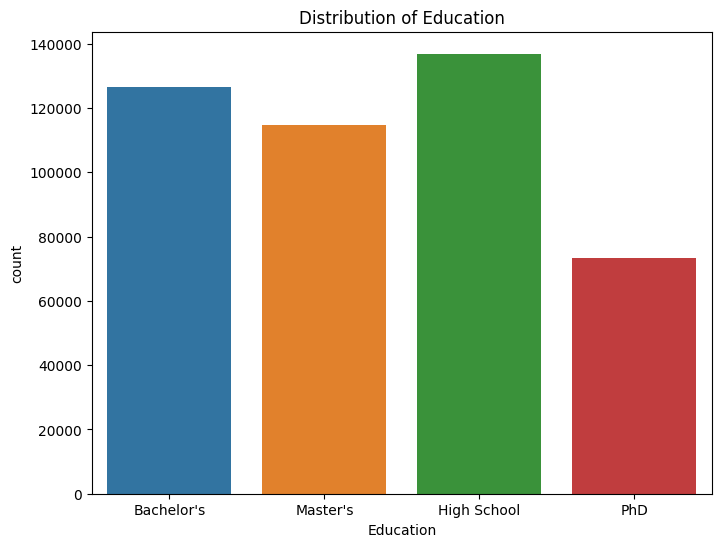

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='Education', hue='Education')
plt.title('Distribution of Education')
plt.show()

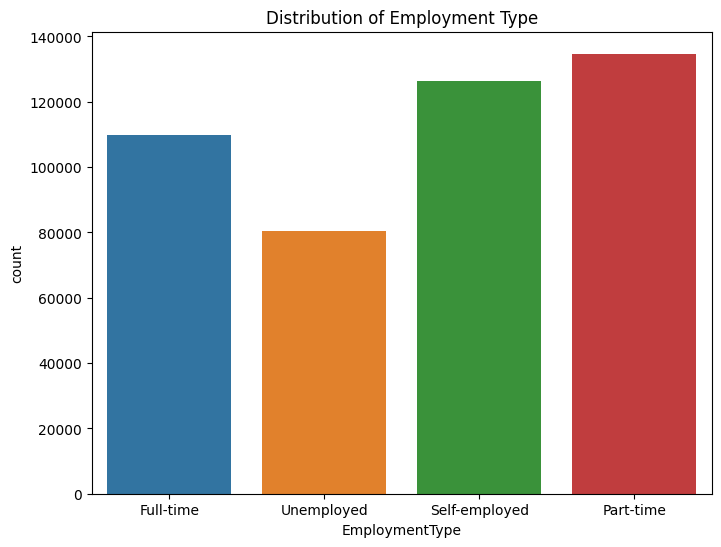

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='EmploymentType', hue='EmploymentType')
plt.title('Distribution of Employment Type')
plt.show()

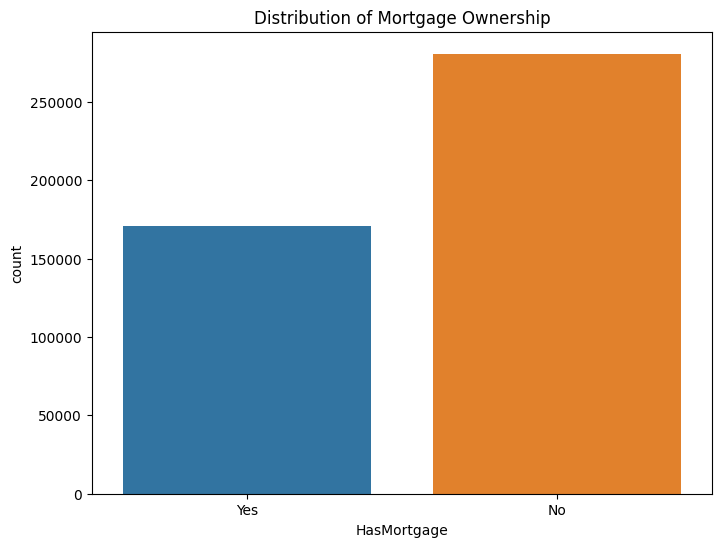

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasMortgage', hue='HasMortgage')
plt.title('Distribution of Mortgage Ownership')
plt.show()

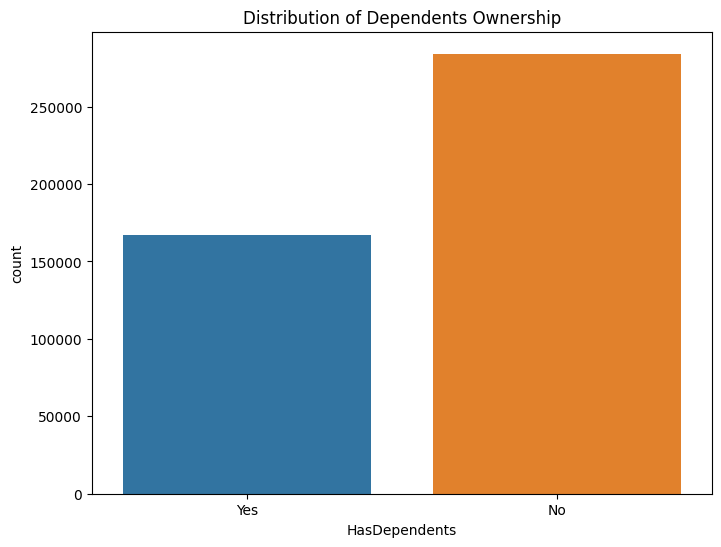

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasDependents', hue='HasDependents')
plt.title('Distribution of Dependents Ownership')
plt.show()

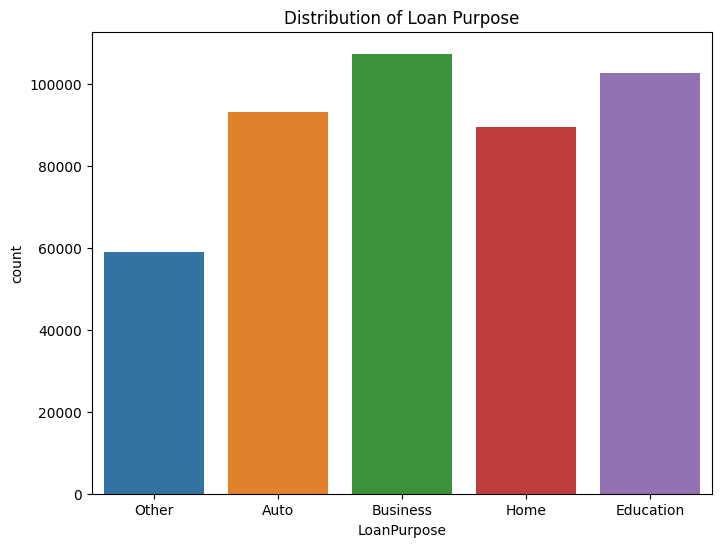

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='LoanPurpose', hue='LoanPurpose')
plt.title('Distribution of Loan Purpose')
plt.show()

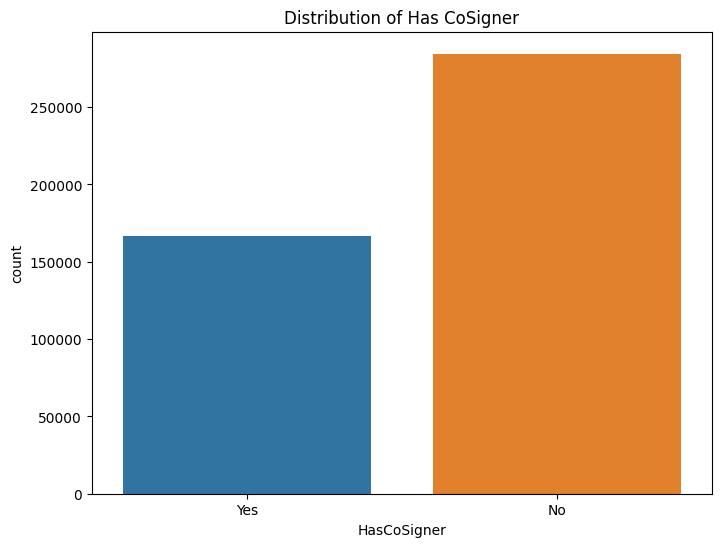

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasCoSigner', hue='HasCoSigner')
plt.title('Distribution of Has CoSigner')
plt.show()

# Multivariate Analysis

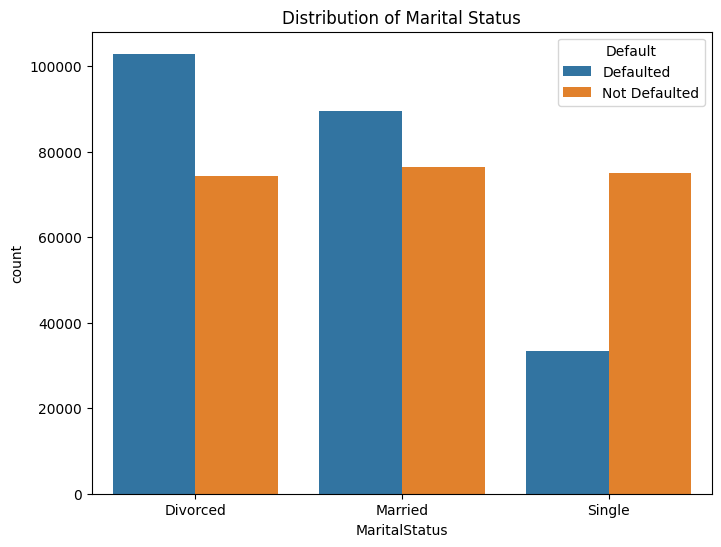

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='MaritalStatus',hue='Default')
plt.title('Distribution of Marital Status')
plt.show()

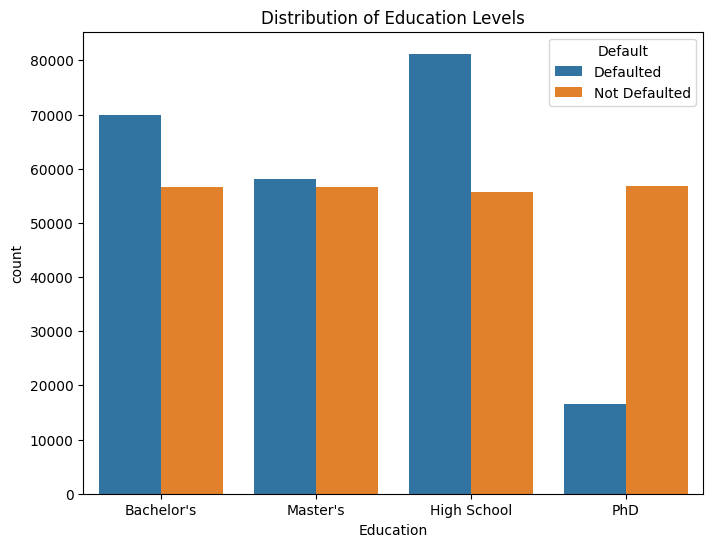

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='Education',hue='Default')
plt.title('Distribution of Education Levels')
plt.show()

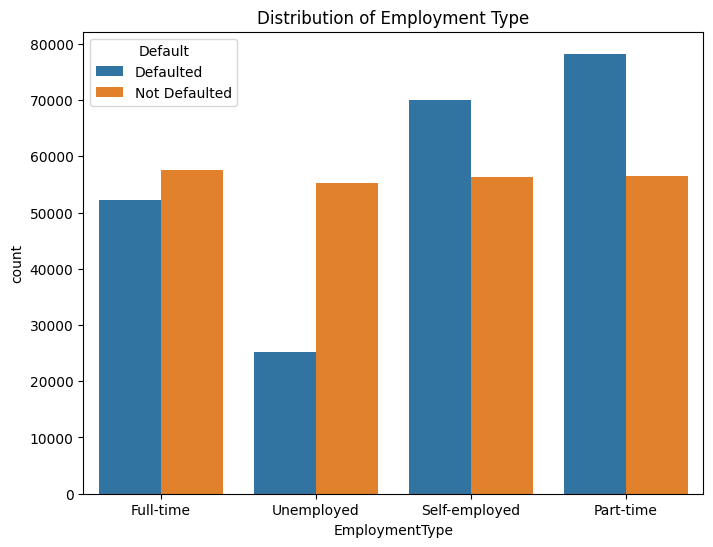

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='EmploymentType', hue='Default')
plt.title('Distribution of Employment Type')
plt.show()

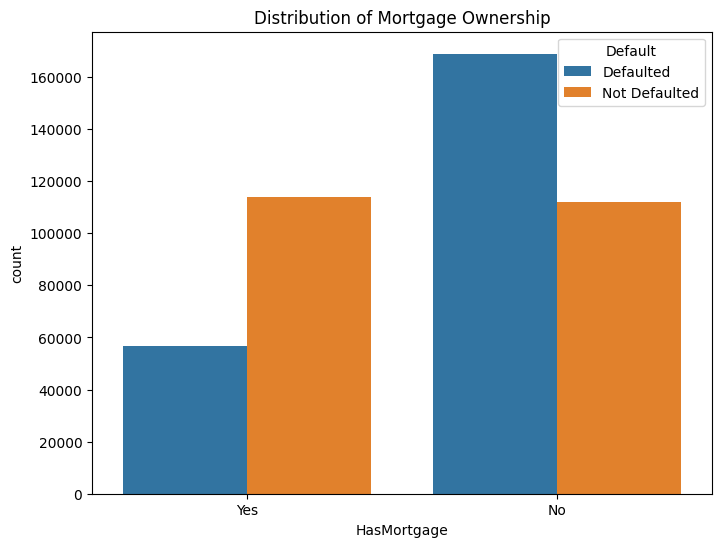

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasMortgage', hue='Default')
plt.title('Distribution of Mortgage Ownership')
plt.show()

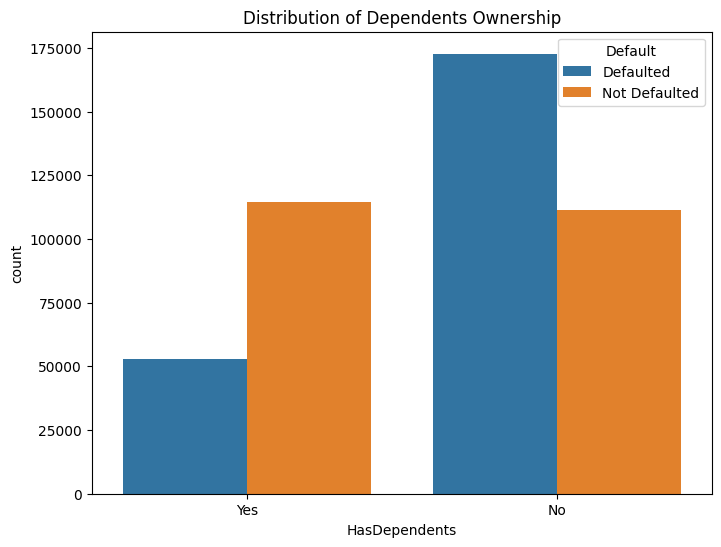

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasDependents', hue='Default')
plt.title('Distribution of Dependents Ownership')
plt.show()

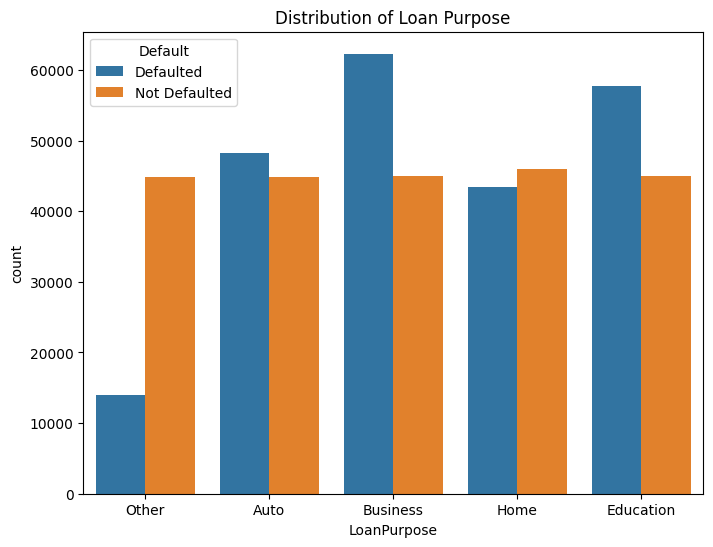

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='LoanPurpose', hue='Default')
plt.title('Distribution of Loan Purpose')
plt.show()

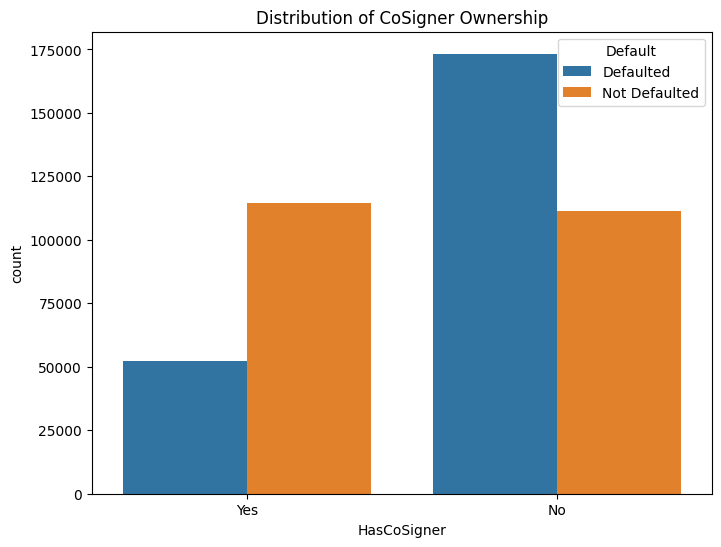

In [62]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='HasCoSigner', hue='Default')
plt.title('Distribution of CoSigner Ownership')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=034ae2da-e2cd-440b-bf98-a709e2f1e5b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>